**Visit With Us Tourism Package**

* Objective: To predict which customer is more likely to purchase the long term travel package.

## **Import and Inspect**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.datasets import make_classification
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier
from IPython.display import display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
data = pd.read_csv('Tourism.csv')

In [4]:
# copying data to another varaible to avoid any changes to original data if needed
df=data.copy()

In [5]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [6]:
df.shape

(4888, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [8]:
df.isnull().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

In [9]:
df.duplicated().value_counts()

False    4888
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [11]:
df.describe(include='object').T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842



---


`INSIGHTS`
* `We have a dataset with 4,888 rows and 20 columns`
* `Datatypes are integers, floats and objects.`
* `There are quite a few missing values`
* `There are no duplicate values`
* `Age is close to normally distributed but with a slight right skew`
* `Monthly Income has outliers on both sides`


---





In [12]:
print(df.nunique())
print('-'*40)
print('columns per datatype:')
print()
print(df.dtypes.value_counts())
print('-'*40)
print('object:')
print()
print(df.select_dtypes(exclude=['int64', 'float64']).nunique())
print('-'*40)
print('int:')
print()
print(df.select_dtypes(exclude=['object', 'float64']).nunique())
print('-'*40)
print('float:')
print()
print(df.select_dtypes(exclude=['object', 'int64']).nunique())


CustomerID                 4888
ProdTaken                     2
Age                          44
TypeofContact                 2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64
----------------------------------------
columns per datatype:

int64      7
float64    7
object     6
dtype: int64
----------------------------------------
object:

TypeofContact     2
Occupation        4
Gender            3
ProductPitched    5
MaritalStatus     4
Designation       5
dtype: int64
----------------------------------------
int:

C

In [13]:
df.drop('CustomerID', axis =1, inplace=True)
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisited', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [14]:
for column in df.select_dtypes(include='object'):
    df[column] = df[column].astype('category')
#print (df.select_dtypes(exclude=['int64', 'float64']).nunique())
print (df.select_dtypes(include=['category']).nunique())

TypeofContact     2
Occupation        4
Gender            3
ProductPitched    5
MaritalStatus     4
Designation       5
dtype: int64




---


`INSIGHTS`

* `Low Unique values ( < 10 ) per datatype indicate that some numeric values have categorical significance`
* `Let’s drop CustomerID now as it is not needed and should be excluded from EDA`
* `Let’s convert objects to categories now`
---





## **Perform an Exploratory Data Analysis on the data AND Illustrate the insights based on EDA -  *7.5 points & 5 points***

In [15]:
sns.set_style("whitegrid");
sns.despine(left=True, bottom=True);

<Figure size 432x288 with 0 Axes>



> ### **UNIVARIANT**





> #### `category`






------------------------------TypeofContact------------------------------------------------------------
TOTALS:
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

PERCENTAGE:
Self Enquiry       70.82
Company Invited    29.18
Name: TypeofContact, dtype: float64



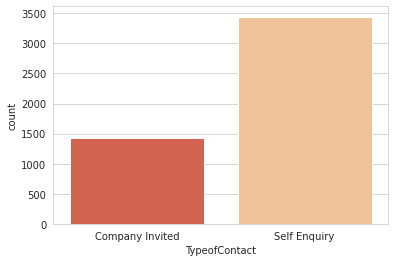



------------------------------Occupation------------------------------------------------------------
TOTALS:
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

PERCENTAGE:
Salaried          48.45
Small Business    42.64
Large Business     8.88
Free Lancer        0.04
Name: Occupation, dtype: float64



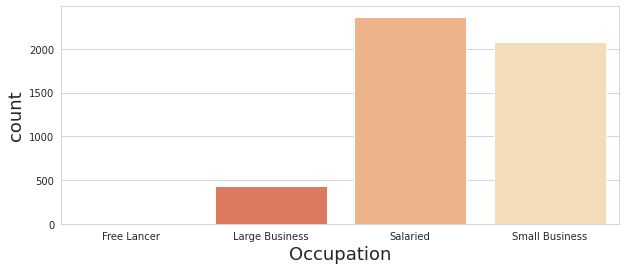



------------------------------Gender------------------------------------------------------------
TOTALS:
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

PERCENTAGE:
Male       59.66
Female     37.17
Fe Male     3.17
Name: Gender, dtype: float64



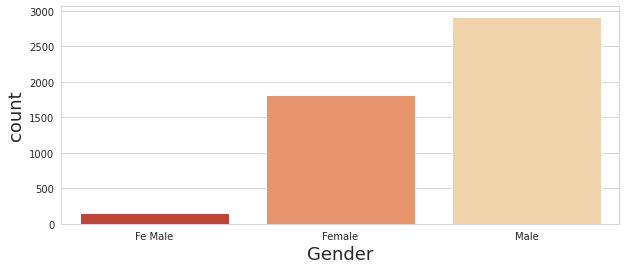



------------------------------ProductPitched------------------------------------------------------------
TOTALS:
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

PERCENTAGE:
Basic           37.68
Deluxe          35.43
Standard        15.18
Super Deluxe     7.00
King             4.71
Name: ProductPitched, dtype: float64



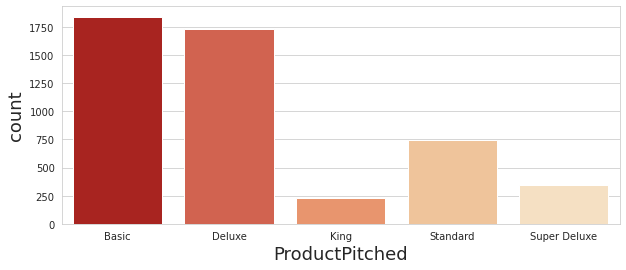



------------------------------MaritalStatus------------------------------------------------------------
TOTALS:
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

PERCENTAGE:
Married      47.87
Divorced     19.44
Single       18.74
Unmarried    13.95
Name: MaritalStatus, dtype: float64



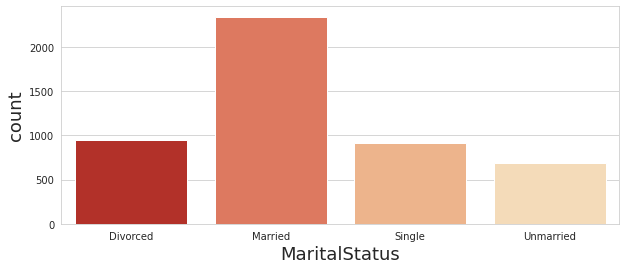



------------------------------Designation------------------------------------------------------------
TOTALS:
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

PERCENTAGE:
Executive         37.68
Manager           35.43
Senior Manager    15.18
AVP                7.00
VP                 4.71
Name: Designation, dtype: float64



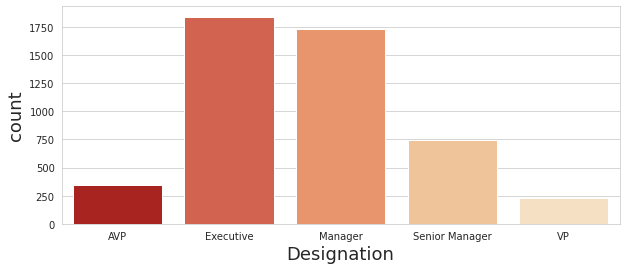

In [16]:
for column in df.select_dtypes(include='category'):
    total = df[column].value_counts()
    percentage = df[column].value_counts(normalize=True).round(4) * 100
    print()
    print('-'*30 + str(column) + '-'*60)
    print('TOTALS:')
    print(total)
    print()
    print('PERCENTAGE:')
    print(percentage)
    print()
    sns.countplot(data=df, x=column, palette='OrRd_r')
    plt.rcParams['figure.figsize']=(10,4)
    plt.rcParams["axes.labelsize"] = 18
    plt.show()
    print()



---

`INSIGHTS`

`Of all the observations in our dataset, less than 1% are Freelancers. Most are either Salaried or Small Business Owners. 60% are Male. Gender has a few incorrect value entries. The Basic and Deluxe packages have been the most widely pitched. Most of the potential customers in our dataset are Married. Executive and Managerial roles make up over 70% of the potential customers in our dataset. These are observations for all potential customers in the dataset. We'll narrow down actual customers later.`


---





> #### `int`




------------------------------ProdTaken------------------------------------------------------------
TOTALS:
0    3968
1     920
Name: ProdTaken, dtype: int64

PERCENTAGE:
0    81.18
1    18.82
Name: ProdTaken, dtype: float64



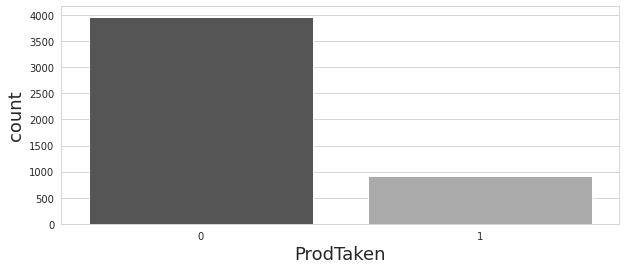



------------------------------CityTier------------------------------------------------------------
TOTALS:
1    3190
3    1500
2     198
Name: CityTier, dtype: int64

PERCENTAGE:
1    65.26
3    30.69
2     4.05
Name: CityTier, dtype: float64



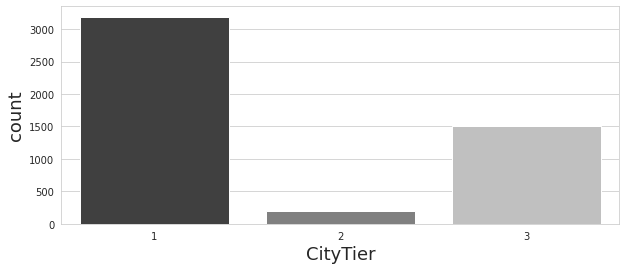



------------------------------NumberOfPersonVisited------------------------------------------------------------
TOTALS:
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisited, dtype: int64

PERCENTAGE:
3    49.14
2    29.01
4    20.99
1     0.80
5     0.06
Name: NumberOfPersonVisited, dtype: float64



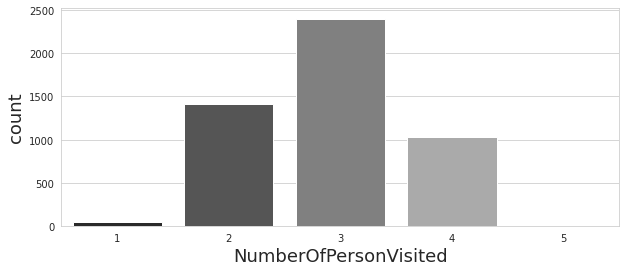



------------------------------Passport------------------------------------------------------------
TOTALS:
0    3466
1    1422
Name: Passport, dtype: int64

PERCENTAGE:
0    70.91
1    29.09
Name: Passport, dtype: float64



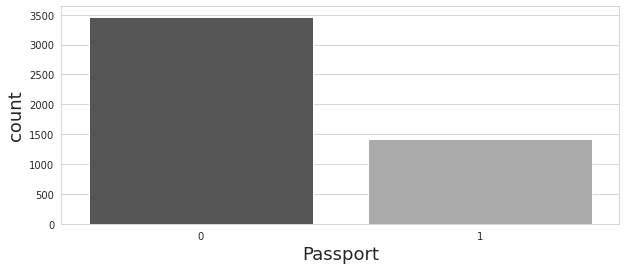



------------------------------PitchSatisfactionScore------------------------------------------------------------
TOTALS:
3    1478
5     970
1     942
4     912
2     586
Name: PitchSatisfactionScore, dtype: int64

PERCENTAGE:
3    30.24
5    19.84
1    19.27
4    18.66
2    11.99
Name: PitchSatisfactionScore, dtype: float64



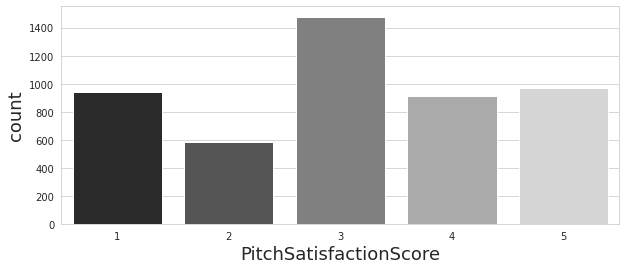



------------------------------OwnCar------------------------------------------------------------
TOTALS:
1    3032
0    1856
Name: OwnCar, dtype: int64

PERCENTAGE:
1    62.03
0    37.97
Name: OwnCar, dtype: float64



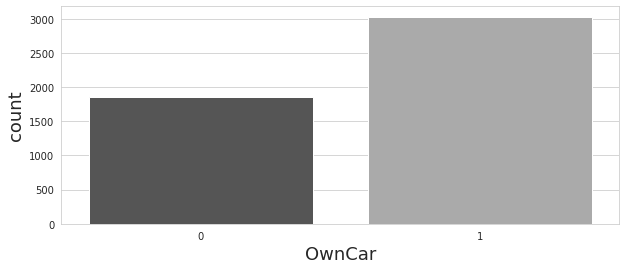

In [17]:
for column in df.select_dtypes(include='int64'):
    uq = df[column].nunique()
    if uq < 10:
      total = df[column].value_counts()
      percentage = df[column].value_counts(normalize=True).round(4) * 100
      print()
      print('-'*30 + str(column) + '-'*60)
      print('TOTALS:')
      print(total)
      print()
      print('PERCENTAGE:')
      print(percentage)
      print()
      sns.countplot(data=df, x=column, palette='gist_gray')
      plt.rcParams['figure.figsize']=(10,4)
      plt.rcParams["axes.labelsize"] = 18
      plt.show()
      print()



---

`INSIGHTS`

`18% of the potential customers in our dataset have purchased a package. 70% of the dataset have Passport flag as “0”. This may mean they don’t have a passport. 31% have a negative PitchSatisfaction score. 62% own a car. "ProdTaken" will be our target variable`


---





> #### `float`




------------------------------NumberOfFollowups------------------------------------------------------------
TOTALS:
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: NumberOfFollowups, dtype: int64

PERCENTAGE:
4.0    42.70
3.0    30.27
5.0    15.86
2.0     4.73
1.0     3.63
6.0     2.81
Name: NumberOfFollowups, dtype: float64



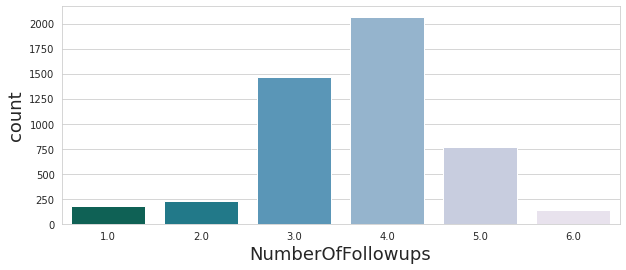



------------------------------PreferredPropertyStar------------------------------------------------------------
TOTALS:
3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64

PERCENTAGE:
3.0    61.56
5.0    19.66
4.0    18.78
Name: PreferredPropertyStar, dtype: float64



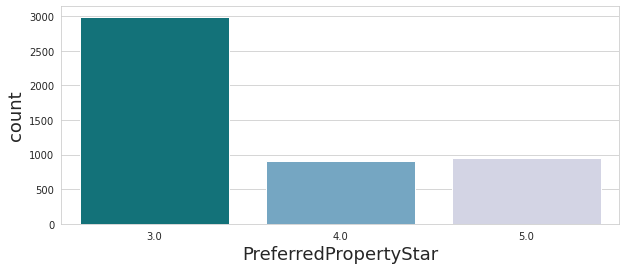



------------------------------NumberOfChildrenVisited------------------------------------------------------------
TOTALS:
1.0    2080
2.0    1335
0.0    1082
3.0     325
Name: NumberOfChildrenVisited, dtype: int64

PERCENTAGE:
1.0    43.14
2.0    27.69
0.0    22.44
3.0     6.74
Name: NumberOfChildrenVisited, dtype: float64



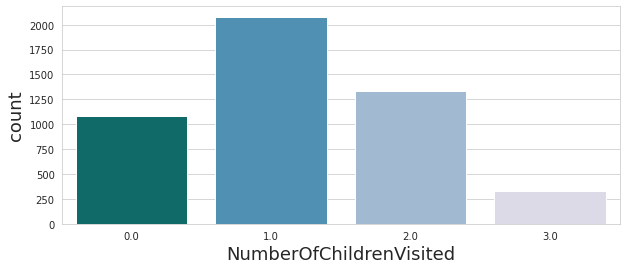

In [18]:
for column in df.select_dtypes(include='float64'):
    uq = df[column].nunique()

    if uq < 10:
      total = df[column].value_counts()
      percentage = df[column].value_counts(normalize=True).round(4) * 100
      print()
      print('-'*30 + str(column) + '-'*60)
      print('TOTALS:')
      print(total)
      print()
      print('PERCENTAGE:')
      print(percentage)
      print()
      #sns.countplot(data=df, x=column, palette='inferno_r')
      sns.countplot(data=df, x=column, palette='PuBuGn_r')
      plt.rcParams['figure.figsize']=(10,4)
      plt.rcParams["axes.labelsize"] = 18
      plt.show()
      print()



---

`INSIGHTS`

`Over 90% of the potential customers have received 3 or more Follow Ups`


---





> #### `visualize the float columns WITHOUT the potential for categorical significance`



In [19]:
# function for boxplot/histplot
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='silver') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram

2855    61.0
2871    61.0
2980    61.0
3323    61.0
3653    61.0
Name: Age, dtype: float64


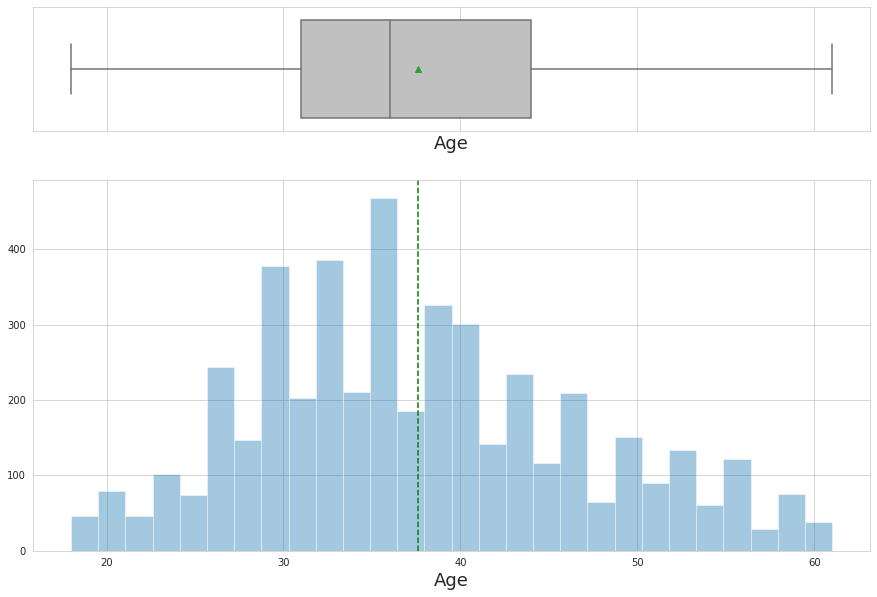




      
3878    127.0
1434    126.0
2505     36.0
2585     36.0
2643     36.0
Name: DurationOfPitch, dtype: float64


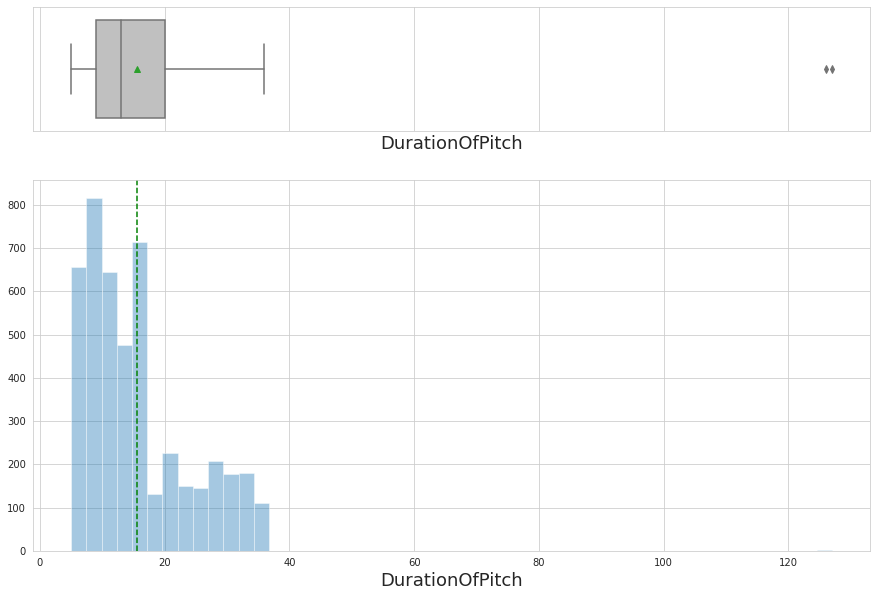




      
3260    22.0
816     21.0
2829    20.0
385     19.0
2446     8.0
Name: NumberOfTrips, dtype: float64


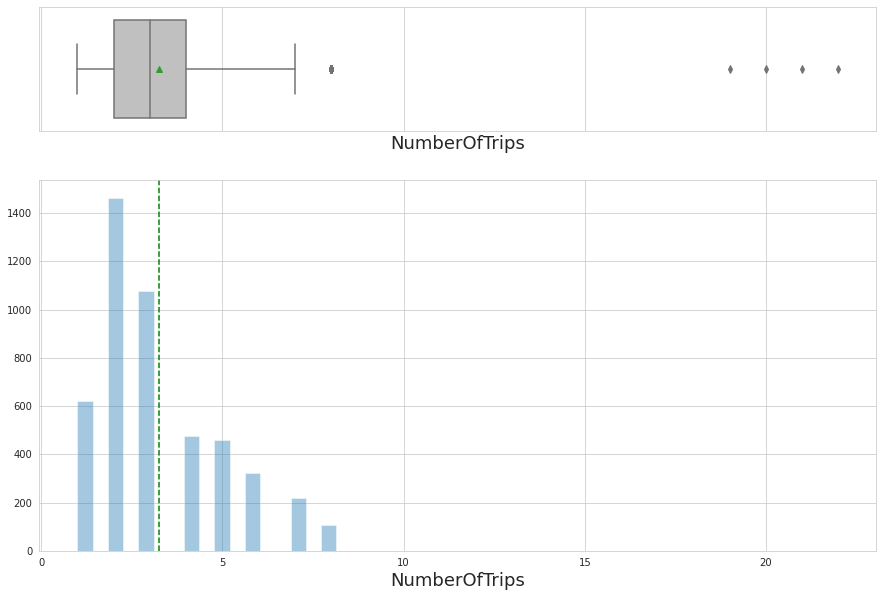




      
2482    98678.0
38      95000.0
2634    38677.0
4104    38677.0
3190    38651.0
Name: MonthlyIncome, dtype: float64


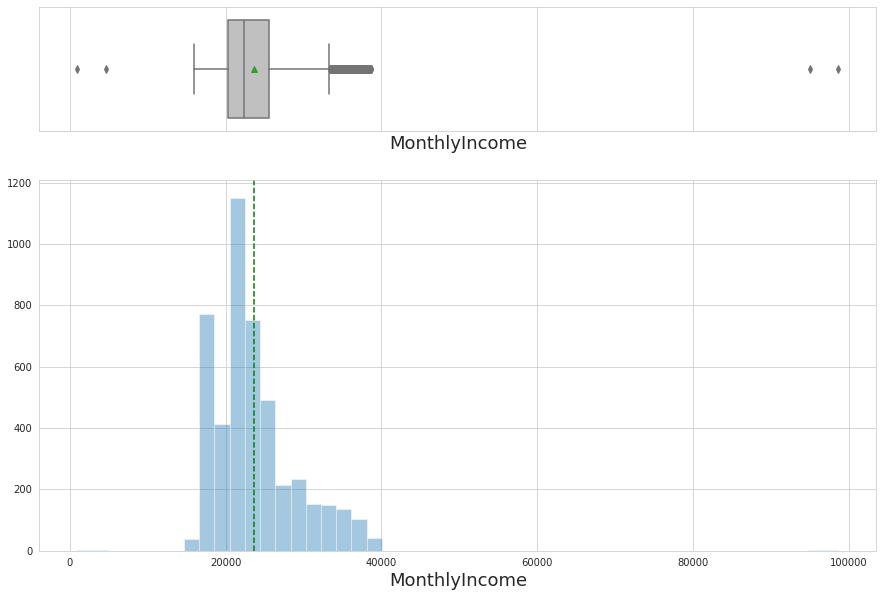

In [20]:
for column in df.select_dtypes(include='float64'):
    uq = df[column].nunique() 
    if uq >= 10:
      #print(uq)
      print(df[column].nlargest())
      histogram_boxplot(df[column])
      plt.show()
      print('''


      ''')



---

`INSIGHTS`

`Monthly Income, NumberOfTrips and DurationOfPitch have outliers. We’ll consider whether or not to remove these later.`


---






> ### **BIVARIANT**





> #### `target variable to categorical correlation`




ProdTaken               0         1
TypeofContact                      
Company Invited  0.281044  0.338059
Self Enquiry     0.718956  0.661941



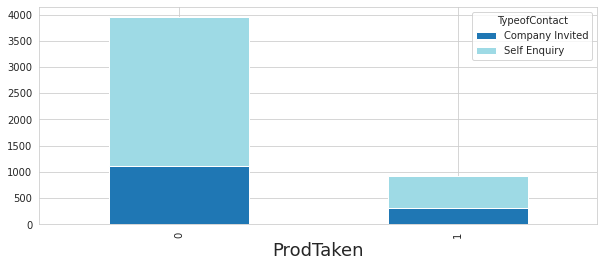

*******************

ProdTaken              0         1
Occupation                        
Free Lancer     0.000000  0.002174
Large Business  0.079133  0.130435
Salaried        0.492440  0.450000
Small Business  0.428427  0.417391



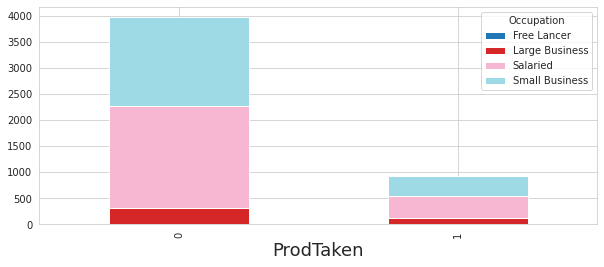

*******************

ProdTaken         0         1
Gender                       
Fe Male    0.032762  0.027174
Female     0.378024  0.344565
Male       0.589214  0.628261



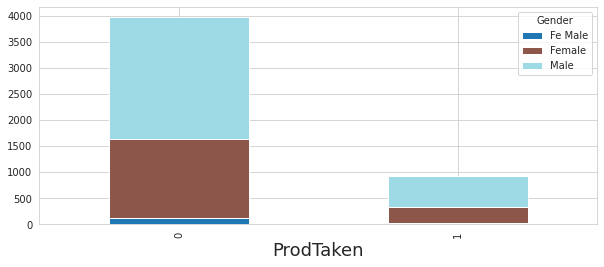

*******************

ProdTaken              0         1
ProductPitched                    
Basic           0.325101  0.600000
Deluxe          0.385081  0.221739
King            0.052923  0.021739
Standard        0.155746  0.134783
Super Deluxe    0.081149  0.021739



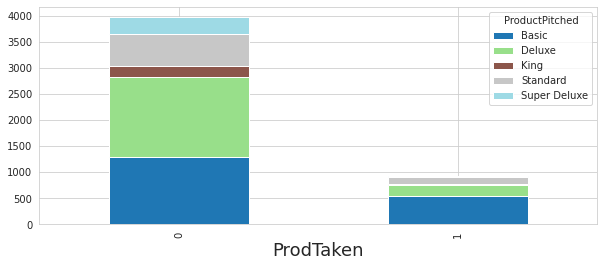

*******************

ProdTaken             0         1
MaritalStatus                    
Divorced       0.208165  0.134783
Married        0.507560  0.354348
Single         0.154234  0.330435
Unmarried      0.130040  0.180435



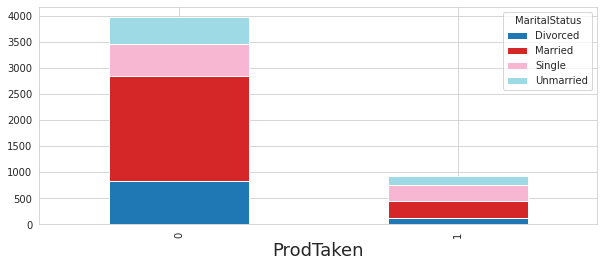

*******************

ProdTaken              0         1
Designation                       
AVP             0.081149  0.021739
Executive       0.325101  0.600000
Manager         0.385081  0.221739
Senior Manager  0.155746  0.134783
VP              0.052923  0.021739



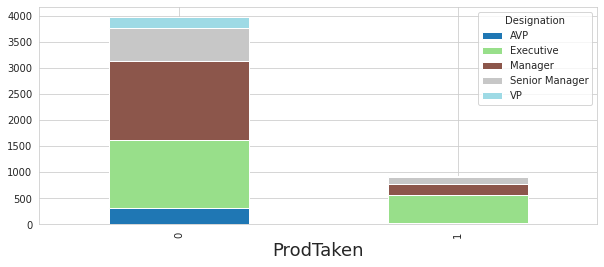

*******************


In [21]:
for column in df.select_dtypes(include='category'):
    print()
    print(pd.crosstab(df[column],df['ProdTaken'],normalize='columns'))
    print()
    df_plot = df.groupby([column, 'ProdTaken']).size().reset_index().pivot(columns=column, index='ProdTaken', values=0)
    #df_plot = df.groupby(['class', 'survived']).size().reset_index().pivot(columns='class', index='survived', values=0)
    df_plot.plot(kind='bar', stacked=True, cmap='tab20')
    #sns.countplot(data=df, x=column, palette='OrRd_r', hue="ProdTaken")
    plt.rcParams['figure.figsize']=(10,4)
    plt.rcParams["axes.labelsize"] = 18
    plt.show()
    print('*******************')


#### CUSTOMER PROFILE
---

`PATTERNS AND INSIGHTS - CUSTOMER PROFILE`

* `65% are Self-Enquiries`
* `86% are either Salaried or Small Business`
* `62% are Male`
* `60% have taken the Basic Package`
* `35% are Married. 33% are Single`
* `60% are designated as Executive`

---





> #### `categorical correlations with each other`



Occupation       Free Lancer  Large Business  Salaried  Small Business
TypeofContact                                                         
Company Invited          0.0        0.253456  0.307237        0.282461
Self Enquiry             1.0        0.746544  0.692763        0.717539


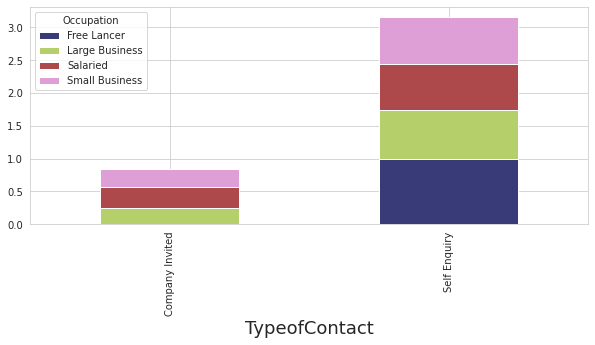

Gender            Fe Male    Female      Male
TypeofContact                                
Company Invited  0.387097  0.283896  0.291624
Self Enquiry     0.612903  0.716104  0.708376


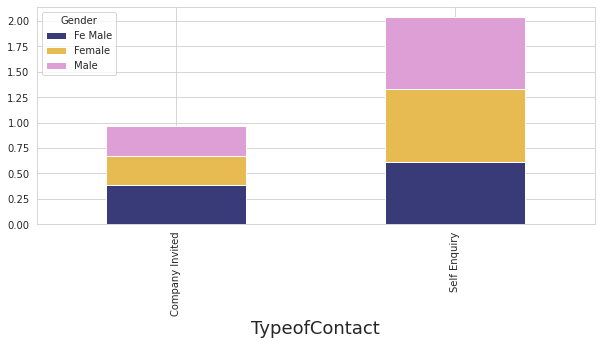

ProductPitched      Basic    Deluxe      King  Standard  Super Deluxe
TypeofContact                                                        
Company Invited  0.281659  0.315084  0.208696  0.293801      0.280702
Self Enquiry     0.718341  0.684916  0.791304  0.706199      0.719298


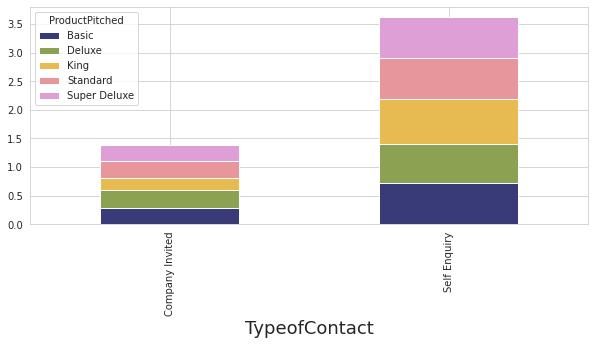

MaritalStatus    Divorced   Married    Single  Unmarried
TypeofContact                                           
Company Invited  0.261653  0.292473  0.305921   0.312317
Self Enquiry     0.738347  0.707527  0.694079   0.687683


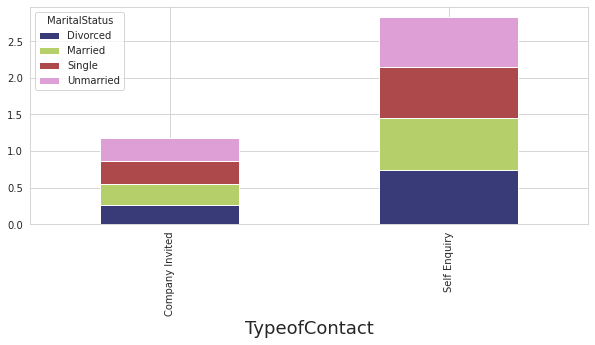

Designation           AVP  Executive   Manager  Senior Manager        VP
TypeofContact                                                           
Company Invited  0.280702   0.281659  0.315084        0.293801  0.208696
Self Enquiry     0.719298   0.718341  0.684916        0.706199  0.791304


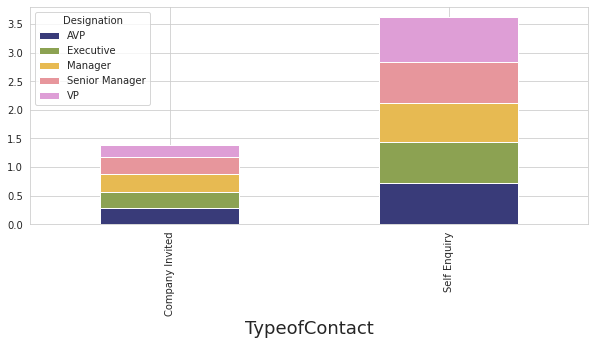

TypeofContact   Company Invited  Self Enquiry
Occupation                                   
Free Lancer            0.000000      0.000581
Large Business         0.077519      0.094077
Salaried               0.511628      0.475319
Small Business         0.410853      0.430023


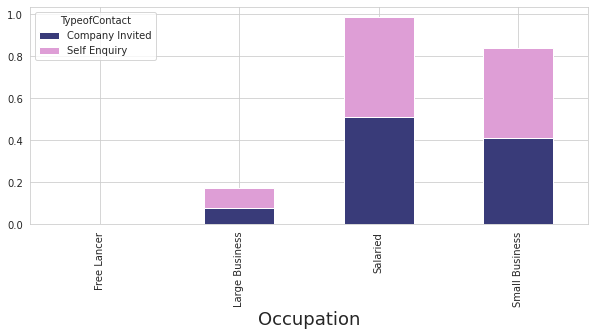

Gender           Fe Male    Female      Male
Occupation                                  
Free Lancer     0.000000  0.000000  0.000686
Large Business  0.083871  0.090809  0.087791
Salaried        0.419355  0.482664  0.489026
Small Business  0.496774  0.426527  0.422497


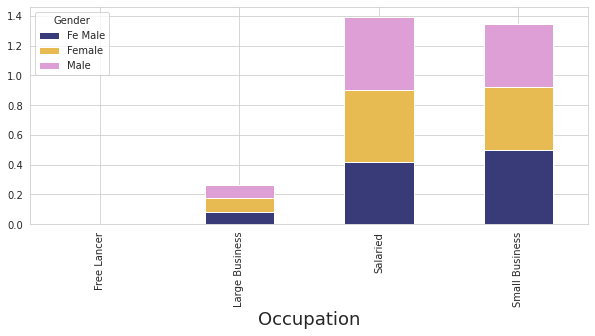

ProductPitched     Basic    Deluxe      King  Standard  Super Deluxe
Occupation                                                          
Free Lancer     0.001086  0.000000  0.000000  0.000000      0.000000
Large Business  0.106406  0.071594  0.052174  0.113208      0.052632
Salaried        0.501629  0.472286  0.495652  0.455526      0.508772
Small Business  0.390879  0.456120  0.452174  0.431267      0.438596


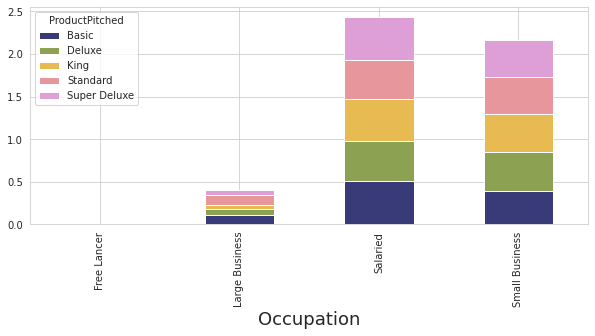

MaritalStatus   Divorced   Married    Single  Unmarried
Occupation                                             
Free Lancer     0.000000  0.000000  0.002183   0.000000
Large Business  0.088421  0.082906  0.101528   0.092375
Salaried        0.480000  0.482051  0.483624   0.500000
Small Business  0.431579  0.435043  0.412664   0.407625


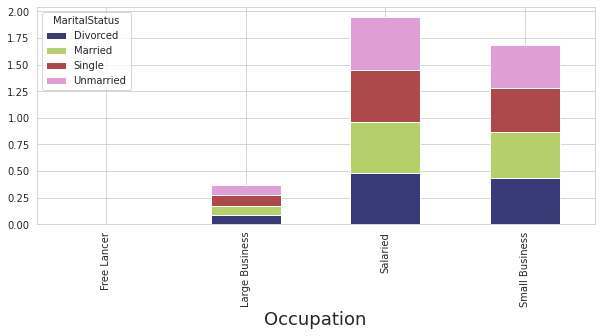

Designation          AVP  Executive   Manager  Senior Manager        VP
Occupation                                                             
Free Lancer     0.000000   0.001086  0.000000        0.000000  0.000000
Large Business  0.052632   0.106406  0.071594        0.113208  0.052174
Salaried        0.508772   0.501629  0.472286        0.455526  0.495652
Small Business  0.438596   0.390879  0.456120        0.431267  0.452174


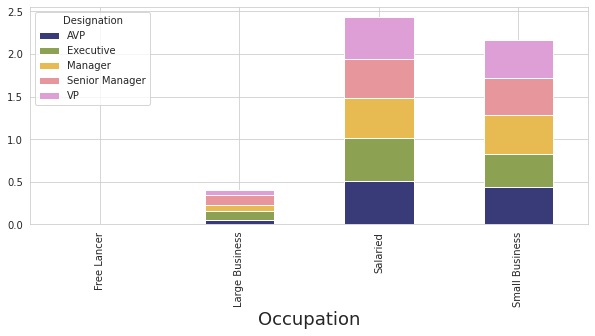

TypeofContact  Company Invited  Self Enquiry
Gender                                      
Fe Male               0.042283      0.027584
Female                0.361522      0.375726
Male                  0.596195      0.596690


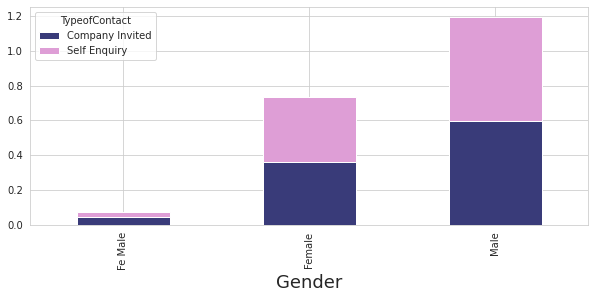

Occupation  Free Lancer  Large Business  Salaried  Small Business
Gender                                                           
Fe Male             0.0        0.029954  0.027449        0.036948
Female              0.0        0.380184  0.370355        0.371881
Male                1.0        0.589862  0.602196        0.591171


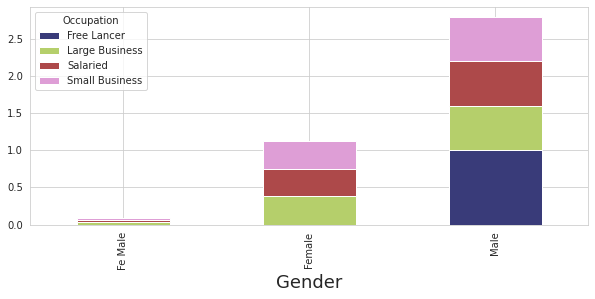

ProductPitched     Basic    Deluxe      King  Standard  Super Deluxe
Gender                                                              
Fe Male         0.002172  0.047921  0.000000  0.084906      0.014620
Female          0.366992  0.370092  0.356522  0.354447      0.453216
Male            0.630836  0.581986  0.643478  0.560647      0.532164


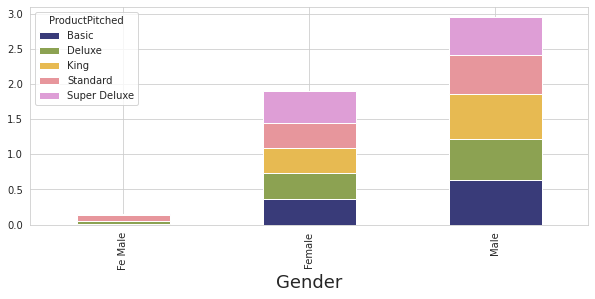

MaritalStatus  Divorced   Married    Single  Unmarried
Gender                                                
Fe Male        0.000000  0.000000  0.003275   0.222874
Female         0.406316  0.382906  0.419214   0.221408
Male           0.593684  0.617094  0.577511   0.555718


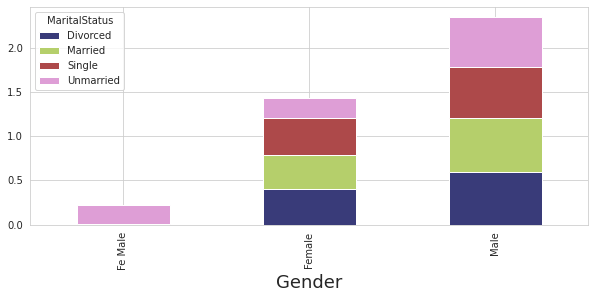

Designation       AVP  Executive   Manager  Senior Manager        VP
Gender                                                              
Fe Male      0.014620   0.002172  0.047921        0.084906  0.000000
Female       0.453216   0.366992  0.370092        0.354447  0.356522
Male         0.532164   0.630836  0.581986        0.560647  0.643478


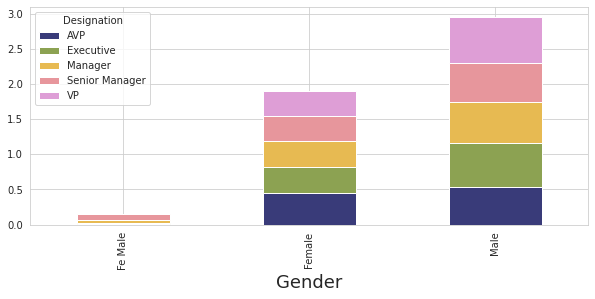

TypeofContact   Company Invited  Self Enquiry
ProductPitched                               
Basic                  0.363636      0.382114
Deluxe                 0.381254      0.341463
King                   0.033827      0.052846
Standard               0.153629      0.152149
Super Deluxe           0.067653      0.071429


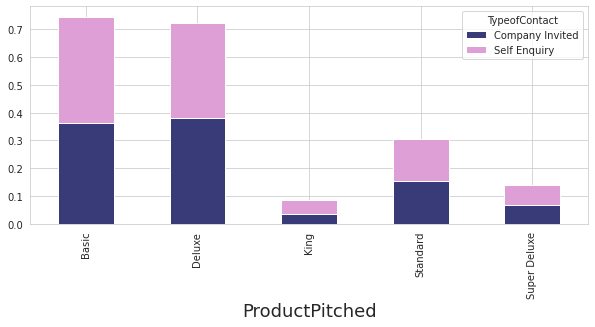

Occupation      Free Lancer  Large Business  Salaried  Small Business
ProductPitched                                                       
Basic                   1.0        0.451613  0.390203        0.345489
Deluxe                  0.0        0.285714  0.345439        0.379079
King                    0.0        0.027650  0.048142        0.049904
Standard                0.0        0.193548  0.142736        0.153551
Super Deluxe            0.0        0.041475  0.073480        0.071977


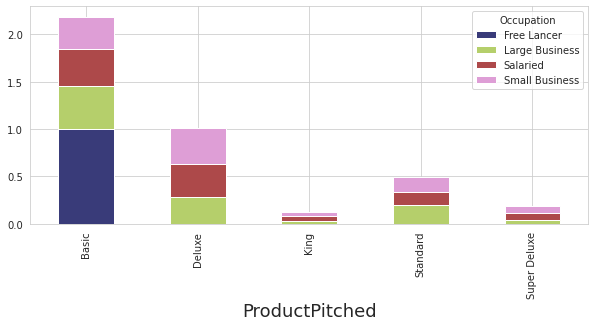

Gender           Fe Male    Female      Male
ProductPitched                              
Basic           0.025806  0.372042  0.398491
Deluxe          0.535484  0.352779  0.345679
King            0.000000  0.045129  0.050754
Standard        0.406452  0.144744  0.142661
Super Deluxe    0.032258  0.085305  0.062414


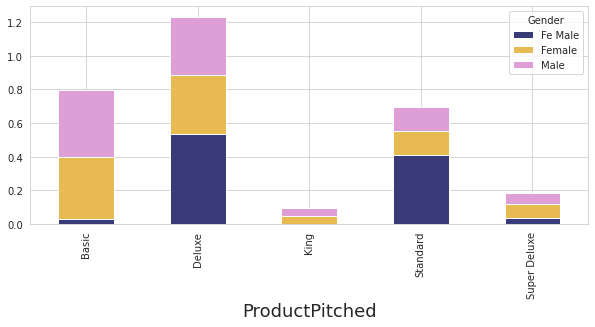

MaritalStatus   Divorced   Married    Single  Unmarried
ProductPitched                                         
Basic           0.349474  0.348718  0.557860   0.268328
Deluxe          0.353684  0.364103  0.241266   0.473607
King            0.054737  0.053846  0.056769   0.000000
Standard        0.149474  0.162393  0.054585   0.249267
Super Deluxe    0.092632  0.070940  0.089520   0.008798


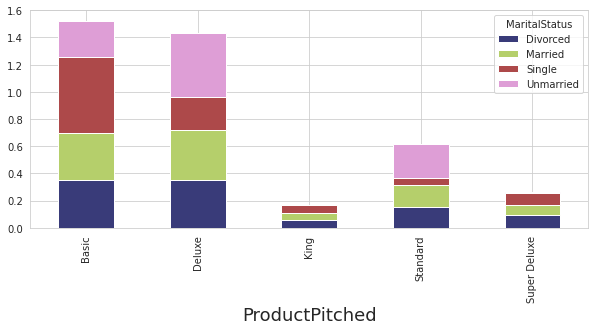

Designation     AVP  Executive  Manager  Senior Manager   VP
ProductPitched                                              
Basic           0.0        1.0      0.0             0.0  0.0
Deluxe          0.0        0.0      1.0             0.0  0.0
King            0.0        0.0      0.0             0.0  1.0
Standard        0.0        0.0      0.0             1.0  0.0
Super Deluxe    1.0        0.0      0.0             0.0  0.0


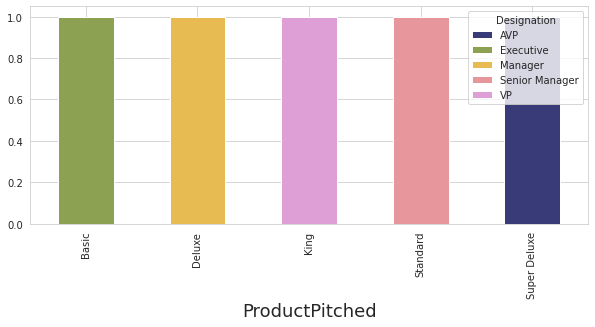

TypeofContact  Company Invited  Self Enquiry
MaritalStatus                               
Divorced              0.174066      0.202381
Married               0.479211      0.477642
Single                0.196617      0.183798
Unmarried             0.150106      0.136179


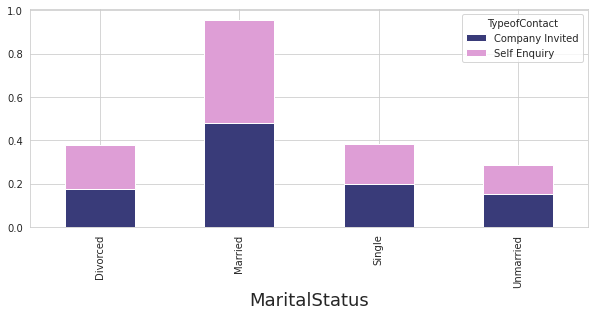

Occupation     Free Lancer  Large Business  Salaried  Small Business
MaritalStatus                                                       
Divorced               0.0        0.193548  0.192568        0.196737
Married                0.0        0.447005  0.476351        0.488484
Single                 1.0        0.214286  0.187078        0.181382
Unmarried              0.0        0.145161  0.144003        0.133397


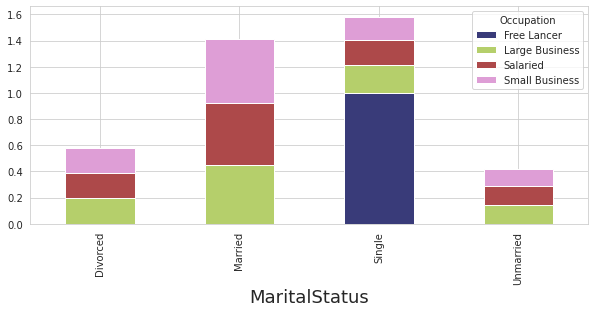

Gender          Fe Male    Female      Male
MaritalStatus                              
Divorced       0.000000  0.212438  0.193416
Married        0.000000  0.493121  0.495199
Single         0.019355  0.211337  0.181413
Unmarried      0.980645  0.083104  0.129973


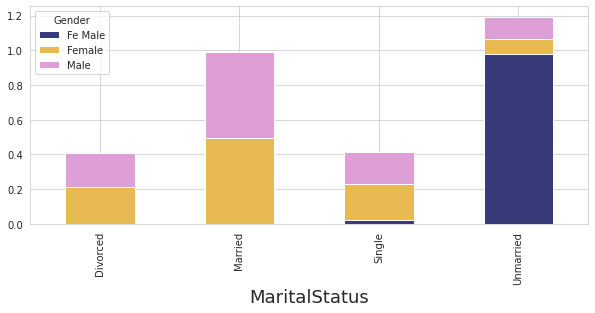

ProductPitched     Basic    Deluxe      King  Standard  Super Deluxe
MaritalStatus                                                       
Divorced        0.180239  0.193995  0.226087  0.191375      0.257310
Married         0.442997  0.491917  0.547826  0.512129      0.485380
Single          0.277416  0.127598  0.226087  0.067385      0.239766
Unmarried       0.099349  0.186490  0.000000  0.229111      0.017544


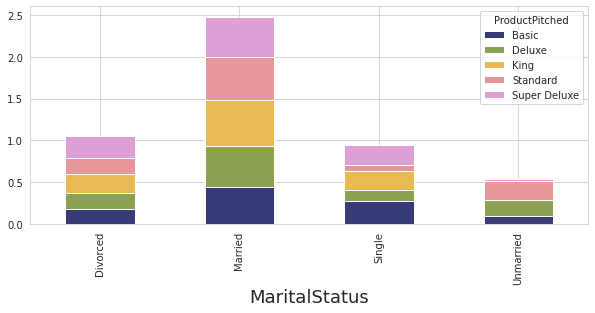

Designation         AVP  Executive   Manager  Senior Manager        VP
MaritalStatus                                                         
Divorced       0.257310   0.180239  0.193995        0.191375  0.226087
Married        0.485380   0.442997  0.491917        0.512129  0.547826
Single         0.239766   0.277416  0.127598        0.067385  0.226087
Unmarried      0.017544   0.099349  0.186490        0.229111  0.000000


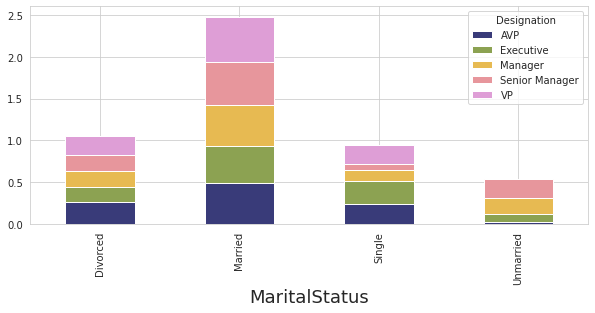

TypeofContact   Company Invited  Self Enquiry
Designation                                  
AVP                    0.067653      0.071429
Executive              0.363636      0.382114
Manager                0.381254      0.341463
Senior Manager         0.153629      0.152149
VP                     0.033827      0.052846


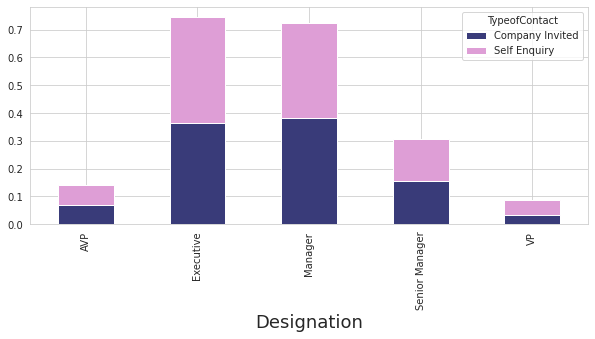

Occupation      Free Lancer  Large Business  Salaried  Small Business
Designation                                                          
AVP                     0.0        0.041475  0.073480        0.071977
Executive               1.0        0.451613  0.390203        0.345489
Manager                 0.0        0.285714  0.345439        0.379079
Senior Manager          0.0        0.193548  0.142736        0.153551
VP                      0.0        0.027650  0.048142        0.049904


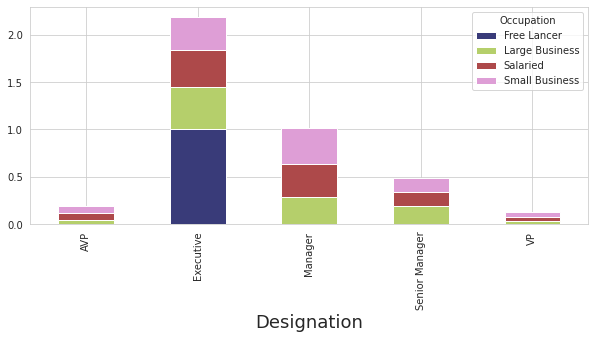

Gender           Fe Male    Female      Male
Designation                                 
AVP             0.032258  0.085305  0.062414
Executive       0.025806  0.372042  0.398491
Manager         0.535484  0.352779  0.345679
Senior Manager  0.406452  0.144744  0.142661
VP              0.000000  0.045129  0.050754


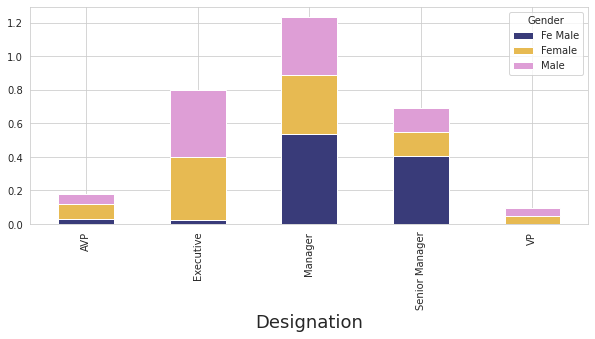

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe
Designation                                                
AVP               0.0     0.0   0.0       0.0           1.0
Executive         1.0     0.0   0.0       0.0           0.0
Manager           0.0     1.0   0.0       0.0           0.0
Senior Manager    0.0     0.0   0.0       1.0           0.0
VP                0.0     0.0   1.0       0.0           0.0


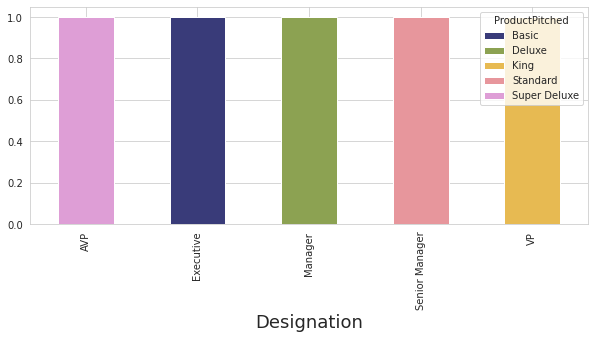

MaritalStatus   Divorced   Married    Single  Unmarried
Designation                                            
AVP             0.092632  0.070940  0.089520   0.008798
Executive       0.349474  0.348718  0.557860   0.268328
Manager         0.353684  0.364103  0.241266   0.473607
Senior Manager  0.149474  0.162393  0.054585   0.249267
VP              0.054737  0.053846  0.056769   0.000000


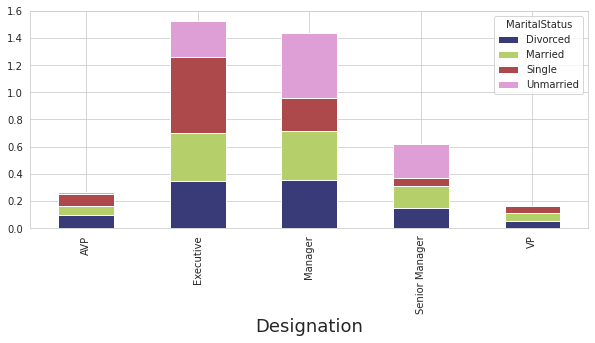

In [22]:
for x in df.select_dtypes(include='category'):
    for hue in df.select_dtypes(include='category'):
      
        if hue != x:
          ct = pd.crosstab(df[x], df[hue],normalize='columns')
          print(ct)
          
          ct.plot.bar(stacked=True, cmap='tab20b')
          plt.show()
    



---

`INSIGHTS`

`There’s a 100% correlation between ProductPitched and Designation. We’ll remove one of these.`

---





> #### `continous numerical correlations`



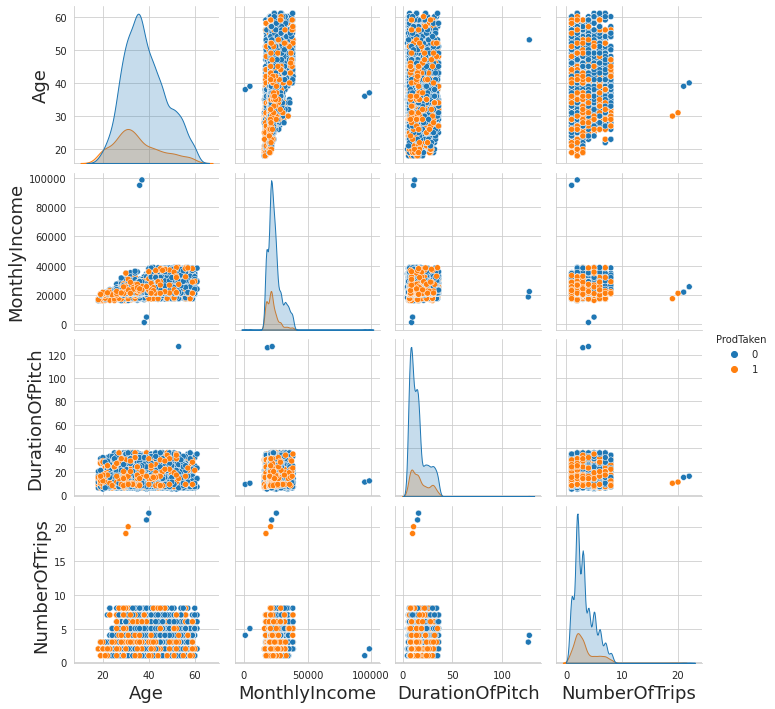

In [23]:
sns.pairplot(data=df, vars=['Age', 'MonthlyIncome', 'DurationOfPitch', 'NumberOfTrips'], hue='ProdTaken')

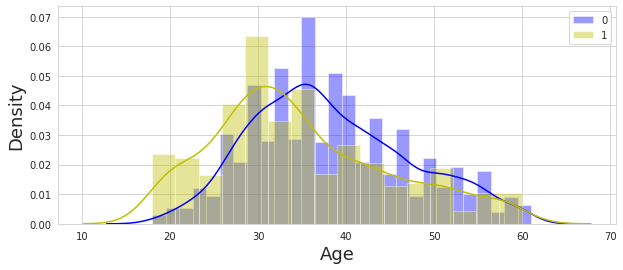

In [24]:
sns.distplot(df[df['ProdTaken']==0]['Age'],color='b',label=0)
sns.distplot(df[df['ProdTaken']==1]['Age'],color='y',label=1)
plt.legend()
plt.show()

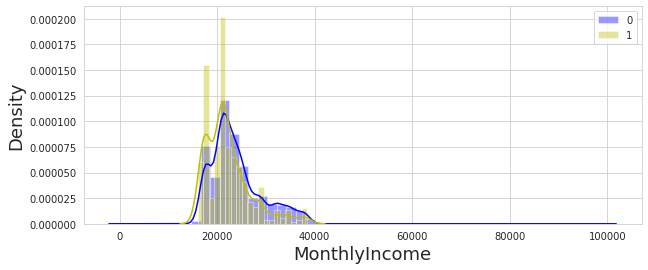

In [25]:
sns.distplot(df[df['ProdTaken']==0]['MonthlyIncome'],color='b',label=0)
sns.distplot(df[df['ProdTaken']==1]['MonthlyIncome'],color='y',label=1)
plt.legend()
plt.show()

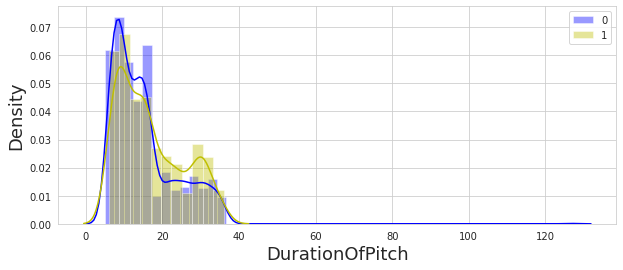

In [26]:
sns.distplot(df[df['ProdTaken']==0]['DurationOfPitch'],color='b',label=0)
sns.distplot(df[df['ProdTaken']==1]['DurationOfPitch'],color='y',label=1)
plt.legend()
plt.show()

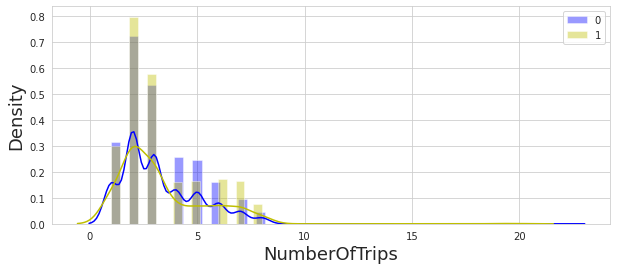

In [27]:
sns.distplot(df[df['ProdTaken']==0]['NumberOfTrips'],color='b',label=0)
sns.distplot(df[df['ProdTaken']==1]['NumberOfTrips'],color='y',label=1)
plt.legend()
plt.show()



---

`INSIGHTS`

`There seems to be a fairly even distribution of the target variable among the continuous features`


---




ProdTaken    0    1
ProdTaken          
0          1.0  0.0
1          0.0  1.0



ProdTaken         0         1
CityTier                     
1          0.672883  0.565217
2          0.038306  0.050000
3          0.288810  0.384783



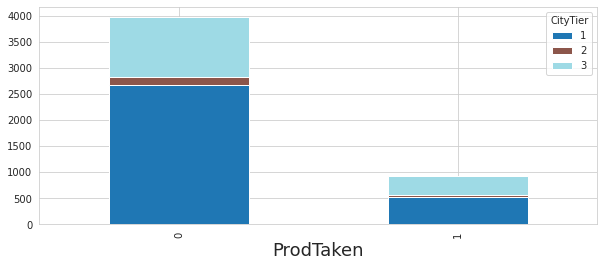

*******************


ProdTaken                     0         1
NumberOfPersonVisited                    
1                      0.009829  0.000000
2                      0.290071  0.290217
3                      0.489415  0.500000
4                      0.209929  0.209783
5                      0.000756  0.000000



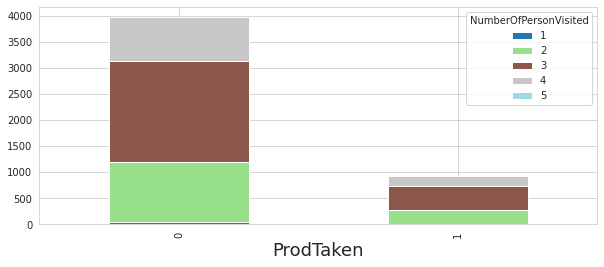

*******************

ProdTaken                 0         1
NumberOfFollowups                    
1.0                0.039685  0.021930
2.0                0.052150  0.026316
3.0                0.310862  0.267544
4.0                0.429662  0.415570
5.0                0.146782  0.209430
6.0                0.020860  0.059211



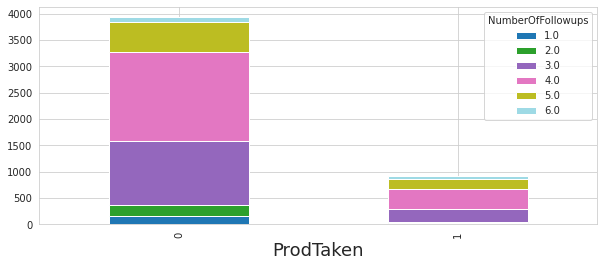

*******************

ProdTaken                     0         1
PreferredPropertyStar                    
3.0                    0.636018  0.527352
4.0                    0.185157  0.199125
5.0                    0.178825  0.273523



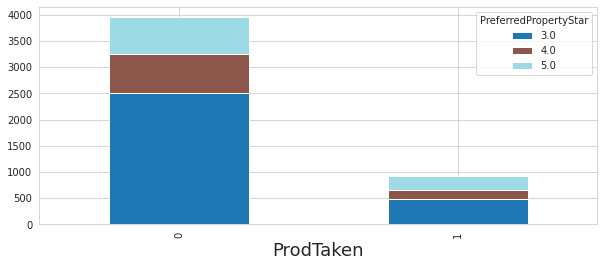

*******************


ProdTaken         0         1
Passport                     
0          0.766129  0.463043
1          0.233871  0.536957



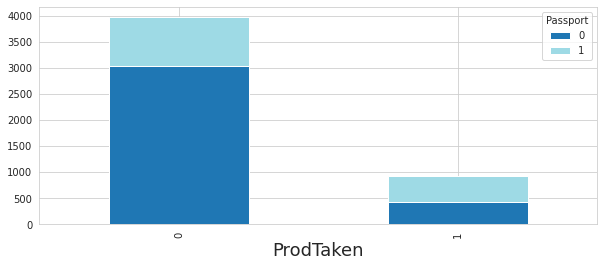

*******************

ProdTaken                      0         1
PitchSatisfactionScore                    
1                       0.201109  0.156522
2                       0.125504  0.095652
3                       0.292843  0.343478
4                       0.189012  0.176087
5                       0.191532  0.228261



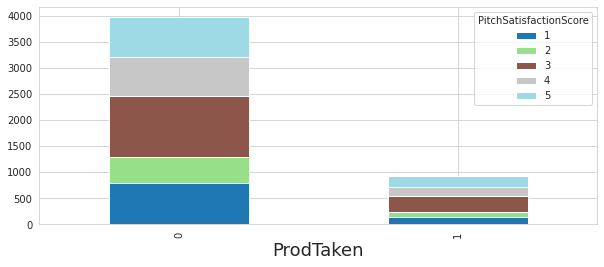

*******************

ProdTaken         0         1
OwnCar                       
0          0.377016  0.391304
1          0.622984  0.608696



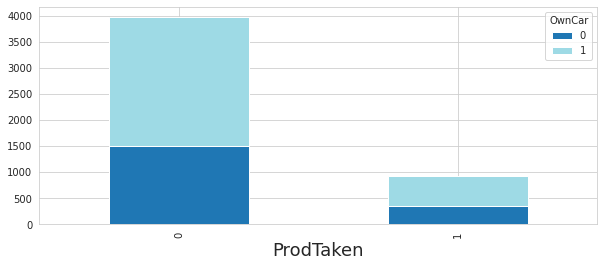

*******************

ProdTaken                       0         1
NumberOfChildrenVisited                    
0.0                      0.225122  0.221249
1.0                      0.431824  0.429354
2.0                      0.276797  0.277108
3.0                      0.066257  0.072289



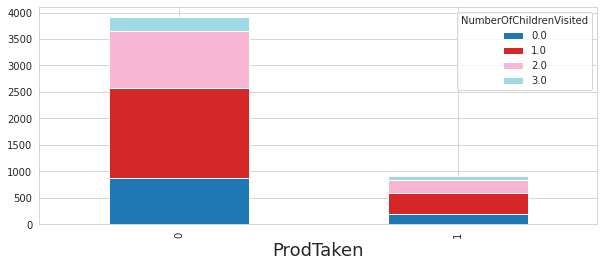

*******************



In [28]:
for column in df.select_dtypes(exclude='category'):
    print()
    uq = df[column].nunique()
    if uq < 10:
      print(pd.crosstab(df[column],df['ProdTaken'],normalize='columns'))
      print()
      if column != 'ProdTaken':
        df_plot = df.groupby([column, 'ProdTaken']).size().reset_index().pivot(columns=column, index='ProdTaken', values=0)
        #df_plot = df.groupby(['class', 'survived']).size().reset_index().pivot(columns='class', index='survived', values=0)
        df_plot.plot(kind='bar', stacked=True, cmap='tab20')
        #sns.countplot(data=df, x=column, palette='OrRd_r', hue="ProdTaken")
        plt.rcParams['figure.figsize']=(10,4)
        plt.rcParams["axes.labelsize"] = 18
        plt.show()
        print('*******************')



> #### `One final look at target variable correlation`



In [29]:
for column in df:
  uq = df[column].nunique()
  if uq < 10:
    tgt_cor = pd.crosstab(df['ProdTaken'], df[column],normalize='columns')
    print(tgt_cor)
    print('''
    
    ''')

ProdTaken    0    1
ProdTaken          
0          1.0  0.0
1          0.0  1.0

    
    
TypeofContact  Company Invited  Self Enquiry
ProdTaken                                   
0                     0.781536      0.823751
1                     0.218464      0.176249

    
    
CityTier          1         2      3
ProdTaken                           
0          0.836991  0.767677  0.764
1          0.163009  0.232323  0.236

    
    
Occupation  Free Lancer  Large Business  Salaried  Small Business
ProdTaken                                                        
0                   0.0        0.723502  0.825169        0.815739
1                   1.0        0.276498  0.174831        0.184261

    
    
Gender     Fe Male    Female      Male
ProdTaken                             
0          0.83871  0.825537  0.801783
1          0.16129  0.174463  0.198217

    
    
NumberOfPersonVisited    1         2         3         4    5
ProdTaken                                              

## **Data Pre-processing - *7.5 points***



> ### **MISSING VALUES TREATMENT**



In [30]:
df.isna().sum()

ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

In [31]:
#replacing with Mean
df["Age"] = df["Age"].fillna(value=df["Age"].mean())
df["MonthlyIncome"] = df["MonthlyIncome"].fillna(value=df["MonthlyIncome"].mean())

In [32]:
#replacing with Median
df["DurationOfPitch"] = df["DurationOfPitch"].fillna(value=df["DurationOfPitch"].median())
df["NumberOfTrips"] = df["NumberOfTrips"].fillna(value=df["NumberOfTrips"].median())

In [33]:
#replacing with Mode 
df["NumberOfFollowups"] = df["NumberOfFollowups"].fillna(4.0)
df["PreferredPropertyStar"] = df["PreferredPropertyStar"].fillna(3.0)
df["NumberOfChildrenVisited"] = df["NumberOfChildrenVisited"].fillna(1.0)

In [34]:
df['TypeofContact'] = df['TypeofContact'].cat.add_categories('Unknown')
df['TypeofContact'].fillna('Unknown', inplace =True)

In [35]:
df.isna().sum()

ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64



---

`INSIGHTS`

`Impuation with appropriate use of Mean, Median and Mode is shown above`




---





> ### **OUTLIERS**



In [36]:
#make a backup
#backup = df

Let's take a look at our canditiates for outlier removal

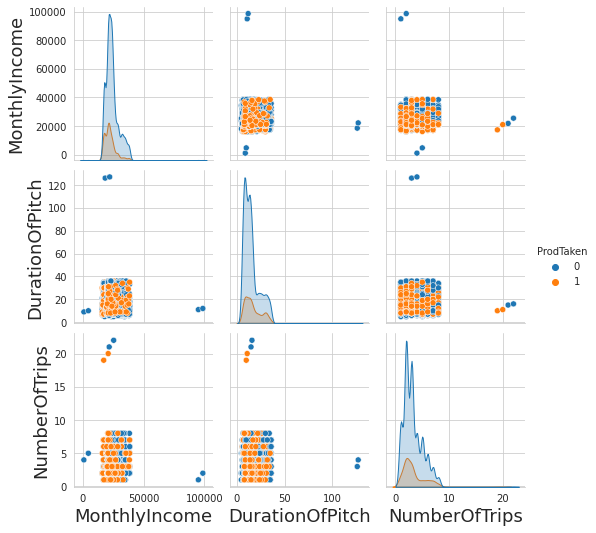

In [37]:
sns.pairplot(data=df, vars=['MonthlyIncome', 'DurationOfPitch', 'NumberOfTrips'], hue='ProdTaken')

Let's also remove the 2 outliers for DurationOfPitch

In [38]:
#model002
df = df[df['DurationOfPitch'] < 126.0]

* In a previous notebook we removed the outliers for MonthlyIncome. It had a negative impact on the model's performance. It's not unlikely for someone to have very low income and others to have very high income as we do in our dataset. Someone could have low income and live with someone else who is the provider. We will not remove these outliers for MonthlyIncome

* We also removed the outliers for NumberOfTrips in a previous notebook with negative consequences, so we will be keeping these.



> ### **INCORRECT VALUES**



In [39]:
print(df['Gender'].value_counts())
df['Gender'].mask(df['Gender'] == 'Fe Male', 'Female', inplace=True)
#df['Gender'].remove_unused_categories(inplace=True).value_counts()
df['Gender'] = df['Gender'].cat.remove_categories('Fe Male')
#df['Gender'] = df[df['Gender'] !=0]
print(df['Gender'].value_counts())

Male       2914
Female     1817
Fe Male     155
Name: Gender, dtype: int64
Male      2914
Female    1972
Name: Gender, dtype: int64


`INSIGNTS`

`Replacing "Fe Male" with "Female"`



> ### **DROP COLUMNS**



In [40]:
pd.crosstab(df['ProdTaken'], df['OwnCar'],normalize='columns')

OwnCar,0,1
ProdTaken,,
0,0.806034,0.815182
1,0.193966,0.184818


`When OwnCar value is 0 or 1 in both cases the distribution of target variable is almost the same therefore dropping OwnCar`

In [41]:
df = df.drop('ProductPitched', axis =1)
df = df.drop('OwnCar', axis =1)


`Dropping ProductPitched due to 100% correlation with Designation`



> ### **NUMERIC TO CATEGORY**



In [42]:
df['CityTier'] = df['CityTier'].astype('category')
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].astype('category')

`CityTier is numerical but we will treat it as a category due to better performance. The same applies to PreferredPropertyStar`



> ### **PREPARE FOR MODELING**



In [43]:
df = pd.get_dummies(df, drop_first=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4886 entries, 0 to 4887
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ProdTaken                   4886 non-null   int64  
 1   Age                         4886 non-null   float64
 2   DurationOfPitch             4886 non-null   float64
 3   NumberOfPersonVisited       4886 non-null   int64  
 4   NumberOfFollowups           4886 non-null   float64
 5   NumberOfTrips               4886 non-null   float64
 6   Passport                    4886 non-null   int64  
 7   PitchSatisfactionScore      4886 non-null   int64  
 8   NumberOfChildrenVisited     4886 non-null   float64
 9   MonthlyIncome               4886 non-null   float64
 10  TypeofContact_Self Enquiry  4886 non-null   uint8  
 11  TypeofContact_Unknown       4886 non-null   uint8  
 12  CityTier_2                  4886 non-null   uint8  
 13  CityTier_3                  4886 

In [45]:
X = df.drop('ProdTaken', axis=1)
y = df.pop("ProdTaken")

In [46]:
#X, y = make_classification(n_classes=2, class_sep=2, weights=[0.7, 0.3], n_features=26, n_samples=2000, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

`We tried boosting performace with make_classification(). We decided not to use it because it was skewing the final results for feature_importances. I'm leaving it here commented out just for future reference. It is not being used as it is commented out`

In [47]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [48]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    #F1 of the Model
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)

    score_list.extend((train_acc, test_acc, train_recall, test_recall, train_precision, test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print()
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print()
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print()
        print("F1 on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test,pred_test))
        
    
    return score_list # returning the list with train and test scores

## **Model Building AND Performance Evaluation / Improvement- Bagging - *6 points AND 9 points***



> ### **BAGGING CLASSIFIER**



In [49]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

In [50]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9932748538011696
Accuracy on test set :  0.903137789904502

Recall on training set :  0.967391304347826
Recall on test set :  0.6304347826086957

Precision on training set :  0.9968
Precision on test set :  0.8130841121495327

F1 on training set :  0.9818754925137904
F1 on test set :  0.710204081632653


*`HYPERPARAMETER TUNING AND IMPROVEMENT - Bagging Classifier`*

In [51]:
# Choose the type of classifier. 
#dtc = DecisionTreeClassifier(criterion="gini", max_depth=6, min_samples_leaf=4)
mcc = make_classification(random_state=5)
logreg = LogisticRegression(random_state=24,fit_intercept=False)
#dtc = DecisionTreeClassifier(criterion="gini", max_depth=12)
dtc = DecisionTreeClassifier(criterion="gini", max_depth=13, min_samples_leaf=4)
bagging_estimator_tuned = BaggingClassifier(base_estimator=dtc, random_state=5)

# Grid of parameters to choose from
## add from article
parameters = {#'n_estimators' : [8,10,15],
              #'max_samples': [0.7,0.8,1],
              #'max_features': [0.7,0.9,1]
              'max_samples': [0.7,0.9,1], 
              #'max_features': [0.8,0.9,1],
              'n_estimators' : [10,20,30,40],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=13,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=4,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
  

*`PERFORMANCE EVALUATION - Bagging Classifier`*

In [52]:
print ('---DEFAULT PERFORMANCE---')
bagging_estimator_score=get_metrics_score(bagging_estimator)
print()
print()
print ('---HYPERTUNING PERFORMANCE---')
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

---DEFAULT PERFORMANCE---
Accuracy on training set :  0.9932748538011696
Accuracy on test set :  0.903137789904502

Recall on training set :  0.967391304347826
Recall on test set :  0.6304347826086957

Precision on training set :  0.9968
Precision on test set :  0.8130841121495327

F1 on training set :  0.9818754925137904
F1 on test set :  0.710204081632653


---HYPERTUNING PERFORMANCE---
Accuracy on training set :  0.9365497076023391
Accuracy on test set :  0.8758526603001364

Recall on training set :  0.7018633540372671
Recall on test set :  0.4855072463768116

Precision on training set :  0.9475890985324947
Precision on test set :  0.7701149425287356

F1 on training set :  0.8064228367528993
F1 on test set :  0.5955555555555555


--- DEFAULT CONFUSION MATRIX ---



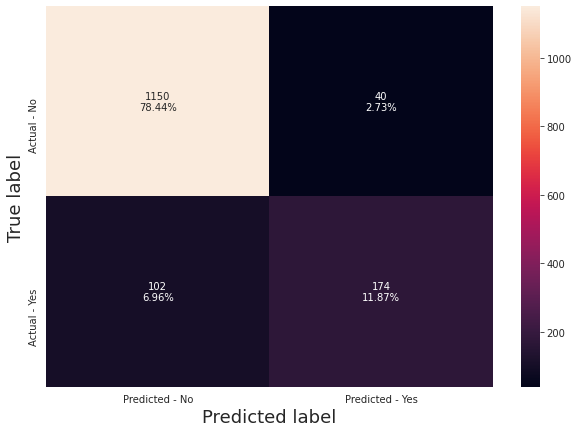

In [53]:
print('--- DEFAULT CONFUSION MATRIX ---')
print()
make_confusion_matrix(bagging_estimator,y_test)

--- HYPERTUNING CONFUSION MATRIX ---



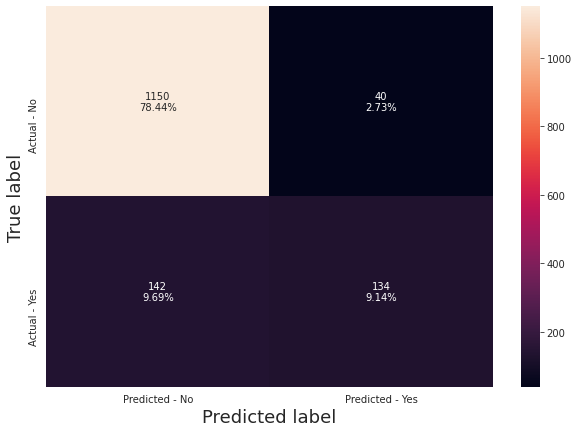

In [54]:
print('--- HYPERTUNING CONFUSION MATRIX ---')
print()
make_confusion_matrix(bagging_estimator_tuned,y_test)

`INSIGHTS`

`Bagging Classifier default settings are overfitting the training data - although all test metrics remain over 60. Final tuning has resulted in lower training numbers - but most test metrics are also lower. Many prior iterations with more complex hyperparameter settings resulted in poorer performance. Using Decision Tree as the base_estimator and limiting parameters have resulted in higher scores. However, more study is needed to find the “sweet spot” for Bagging Classifier hyperparameters.`



> ### **RANDOM FOREST CLASSIFIER**



In [55]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [56]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9229195088676672

Recall on training set :  1.0
Recall on test set :  0.6195652173913043

Precision on training set :  1.0
Precision on test set :  0.9553072625698324

F1 on training set :  1.0
F1 on test set :  0.7516483516483516




> *`HYPERPARAMETER TUNING - Random Forest`*



In [57]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"max_depth": [3,8,12],
              "n_estimators": [200,300,400]
             }
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)



> *`PERFORMANCE EVALUATION - Random Forest`*



In [58]:
print ('---DEFAULT PERFORMANCE---')
rf_estimator_score=get_metrics_score(rf_estimator)
print()
print()
print ('---HYPERTUNING PERFORMANCE---')
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

---DEFAULT PERFORMANCE---
Accuracy on training set :  1.0
Accuracy on test set :  0.9229195088676672

Recall on training set :  1.0
Recall on test set :  0.6195652173913043

Precision on training set :  1.0
Precision on test set :  0.9553072625698324

F1 on training set :  1.0
F1 on test set :  0.7516483516483516


---HYPERTUNING PERFORMANCE---
Accuracy on training set :  0.9815789473684211
Accuracy on test set :  0.907912687585266

Recall on training set :  0.9021739130434783
Recall on test set :  0.5362318840579711

Precision on training set :  1.0
Precision on test set :  0.9548387096774194

F1 on training set :  0.9485714285714286
F1 on test set :  0.6867749419953597


--- DEFAULT CONFUSION MATRIX ---



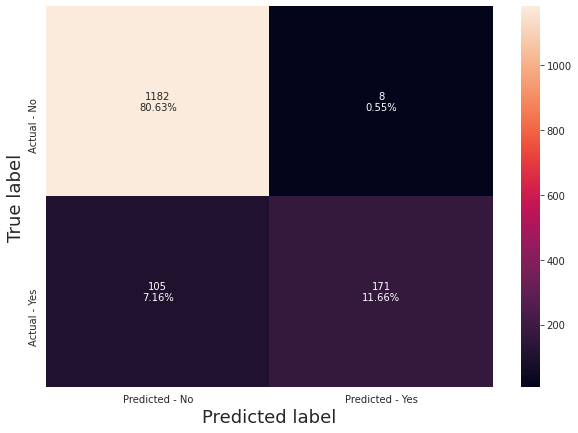

In [59]:
print('--- DEFAULT CONFUSION MATRIX ---')
print()
make_confusion_matrix(rf_estimator,y_test)

--- HYPERTUNING CONFUSION MATRIX ---



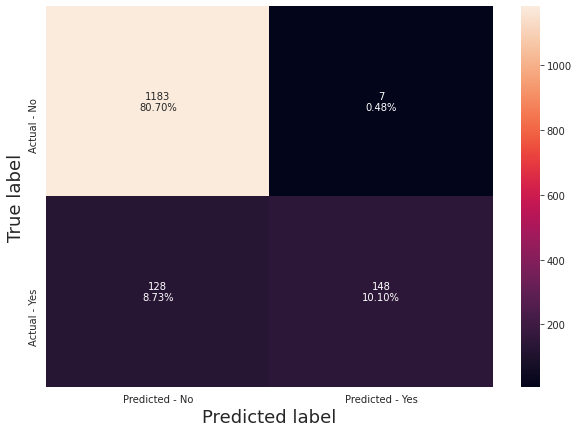

In [60]:
print('--- HYPERTUNING CONFUSION MATRIX ---')
print()
make_confusion_matrix(rf_estimator_tuned,y_test)

`INSIGHTS`

`Random Forest Classifier default settings are overfitting the training data for all metrics as expected. Testing Accuracy and Precision are over 90. Recall is struggling at 61. Many prior iterations with more complex hyperparameter settings resulted in poorer performance. Limiting hyperparameters to max_depth and n_estimators resulted in reduced overfitting of the training data. However, more study is needed to find the “sweet spot” for Random Forest Classifier hyperparameters.`



> ### **DECISION TREE CLASSIFIER**



In [61]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [62]:
dTree_score=get_metrics_score(dTree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8983628922237381

Recall on training set :  1.0
Recall on test set :  0.7246376811594203

Precision on training set :  1.0
Precision on test set :  0.7326007326007326

F1 on training set :  1.0
F1 on test set :  0.7285974499089253




> `HYPERPARAMETER TUNING - Decision Tree`*



In [63]:
# Choose the type of classifier. 
dTree_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': [4,10,None], 
              'min_samples_leaf': [5, 20, 70]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dTree_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dTree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dTree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')



> *`PERFORMANCE EVALUATION - Decision Tree`*



In [64]:
print ('---DEFAULT PERFORMANCE---')
dTree_score=get_metrics_score(dTree)
print()
print()
print ('---HYPERTUNING PERFORMANCE---')
dTree_tuned_score=get_metrics_score(dTree_tuned)

---DEFAULT PERFORMANCE---
Accuracy on training set :  1.0
Accuracy on test set :  0.8983628922237381

Recall on training set :  1.0
Recall on test set :  0.7246376811594203

Precision on training set :  1.0
Precision on test set :  0.7326007326007326

F1 on training set :  1.0
F1 on test set :  0.7285974499089253


---HYPERTUNING PERFORMANCE---
Accuracy on training set :  0.9298245614035088
Accuracy on test set :  0.864256480218281

Recall on training set :  0.7670807453416149
Recall on test set :  0.5797101449275363

Precision on training set :  0.8458904109589042
Precision on test set :  0.6584362139917695

F1 on training set :  0.8045602605863191
F1 on test set :  0.6165703275529865


--- DEFAULT CONFUSION MATRIX ---



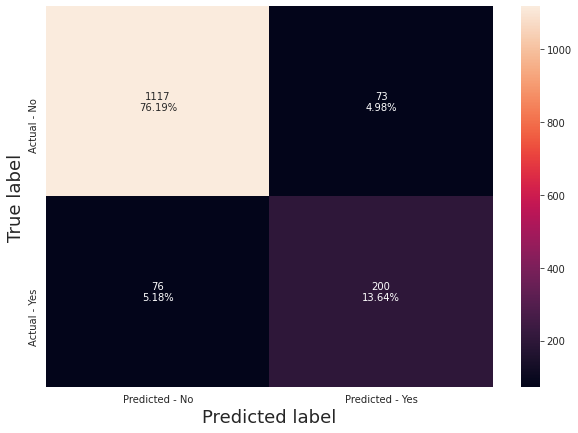

In [65]:
print('--- DEFAULT CONFUSION MATRIX ---')
print()
make_confusion_matrix(dTree,y_test)

--- HYPERTUNING CONFUSION MATRIX ---



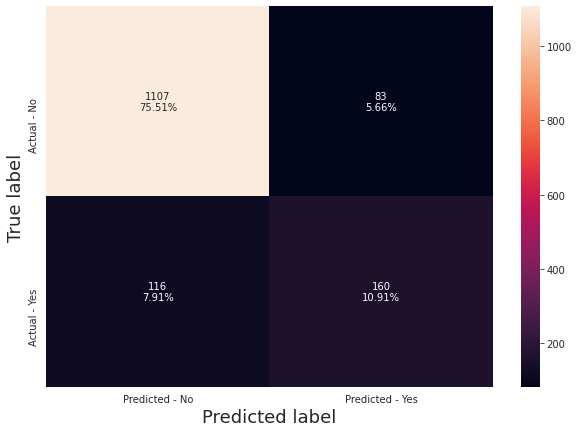

In [66]:
print('--- HYPERTUNING CONFUSION MATRIX ---')
print()
make_confusion_matrix(dTree_tuned,y_test)

`INSIGHTS`

`Decision Tree Classifier default settings are overfitting the training data more than RF and Bagging. This is to be expected. Hyperparameter settings have reduced overfitting. Testing Accuracy, Precision and F1 are acceptable - but Recall is low at 57. We’re more concerned about Precision. See Business Recommendations at the end of this file. More study is needed to find the “sweet spot” for Decision Tree Classifier hyperparameters.`

## `Of the Bagging Classifers, we will choose the Tuned Decision Tree Classifer based on the default estimators with Precision in mind - see Actionable Insights in the section at the end of this page for details and feature importances.`

## **Model Building AND Performance Evaluation / Improvement- Boosting - *8 points AND 12 points***




> ### **ADABOOST CLASSIFIER**



In [67]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)

In [68]:
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8494152046783626
Accuracy on test set :  0.8478854024556617

Recall on training set :  0.30745341614906835
Recall on test set :  0.3079710144927536

Precision on training set :  0.7415730337078652
Precision on test set :  0.7264957264957265

F1 on training set :  0.4346871569703623
F1 on test set :  0.43256997455470736


*`HYPERPARAMETER TUNING AND IMPROVEMENT - AdaBoost Classifier`*

In [69]:
# Choose the type of classifier. 
#abc_tuned = AdaBoostClassifier(random_state=1)
abc_tuned = AdaBoostClassifier(random_state=1, base_estimator = DecisionTreeClassifier(max_depth=3))

# Grid of parameters to choose from
## add from article
parameters = {
    'n_estimators':[50,100], 
    'learning_rate': [1, 0.1, 0.5, 0.01],
    #Let's try different max_depth for base_estimator
    #"base_estimator":[DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    #"n_estimators": [10,150,250],
   # "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

*`PERFORMANCE EVALUATION - AdaBoost Classifier`*

In [70]:
print ('---DEFAULT PERFORMANCE---')
abc_score=get_metrics_score(abc)
print()
print()
print ('---HYPERTUNING PERFORMANCE---')
abc_tuned_score=get_metrics_score(abc_tuned)

---DEFAULT PERFORMANCE---
Accuracy on training set :  0.8494152046783626
Accuracy on test set :  0.8478854024556617

Recall on training set :  0.30745341614906835
Recall on test set :  0.3079710144927536

Precision on training set :  0.7415730337078652
Precision on test set :  0.7264957264957265

F1 on training set :  0.4346871569703623
F1 on test set :  0.43256997455470736


---HYPERTUNING PERFORMANCE---
Accuracy on training set :  0.9909356725146199
Accuracy on test set :  0.892905866302865

Recall on training set :  0.9565217391304348
Recall on test set :  0.644927536231884

Precision on training set :  0.9951534733441034
Precision on test set :  0.7510548523206751

F1 on training set :  0.9754552652414885
F1 on test set :  0.6939571150097467


--- DEFAULT CONFUSION MATRIX ---



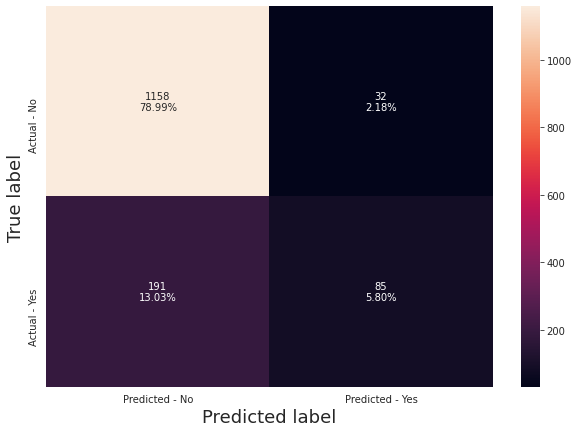

In [71]:
print('--- DEFAULT CONFUSION MATRIX ---')
print()
make_confusion_matrix(abc,y_test)

--- HYPERTUNING CONFUSION MATRIX ---



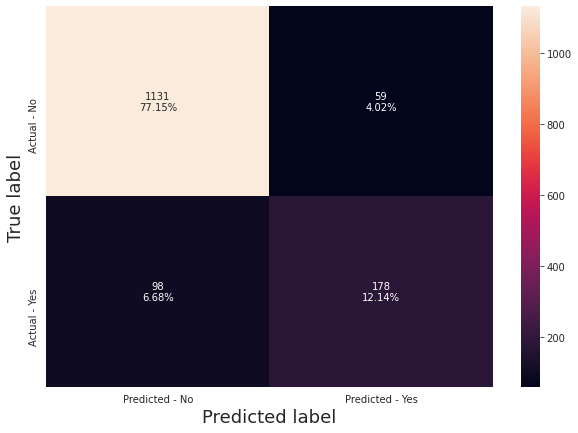

In [72]:
print('--- HYPERTUNING CONFUSION MATRIX ---')
print()
make_confusion_matrix(abc_tuned,y_test)

`INSIGHTS`

`Ada Boost Classifier default settings are NOT overfitting the training data - but Recall and F1 are too low. Accuracy and Precision are acceptable in the 80’s and 70’s. Hyperparameter settings have overfitted the training data. Initial iterations and too many hyperparameter settings contributed to excessive overfitting. Reducing the amount of parameters has helped. Also, using the max_depth feature of the Decision Tree base_estimator has reduced overfitting. However, overfitting is still a problem.  More study is needed to find the “sweet spot” for Ada Boost Classifier hyperparameters.`



> ### **GRADIENT BOOST CLASSIFIER**



In [73]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [74]:
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8888888888888888
Accuracy on test set :  0.8697135061391542

Recall on training set :  0.4704968944099379
Recall on test set :  0.42028985507246375

Precision on training set :  0.8859649122807017
Precision on test set :  0.7891156462585034

F1 on training set :  0.6146044624746451
F1 on test set :  0.5484633569739952


*`HYPERPARAMETER TUNING AND IMPROVEMENT - GradientBoost Classifier`*

In [75]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #"n_estimators": [100,150,200,250],
    "max_depth": [3,6],
    "n_estimators": [100,150],
    #"subsample":[0.8,0.9,1],
    #"max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse',
                           init=AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=None,
                                                   learning_rate=1.0,
                                                   n_estimators=50,
                                                   random_state=1),
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
            

*`PERFORMANCE EVALUATION - Gradient Boost Classifier`*

In [76]:
print ('---DEFAULT PERFORMANCE---')
gbc_score=get_metrics_score(gbc)
print()
print()
print ('---HYPERTUNING PERFORMANCE---')
gbc_tuned_score=get_metrics_score(gbc_tuned)

---DEFAULT PERFORMANCE---
Accuracy on training set :  0.8888888888888888
Accuracy on test set :  0.8697135061391542

Recall on training set :  0.4704968944099379
Recall on test set :  0.42028985507246375

Precision on training set :  0.8859649122807017
Precision on test set :  0.7891156462585034

F1 on training set :  0.6146044624746451
F1 on test set :  0.5484633569739952


---HYPERTUNING PERFORMANCE---
Accuracy on training set :  0.9982456140350877
Accuracy on test set :  0.927012278308322

Recall on training set :  0.9906832298136646
Recall on test set :  0.6884057971014492

Precision on training set :  1.0
Precision on test set :  0.9004739336492891

F1 on training set :  0.9953198127925117
F1 on test set :  0.7802874743326489


--- DEFAULT CONFUSION MATRIX ---



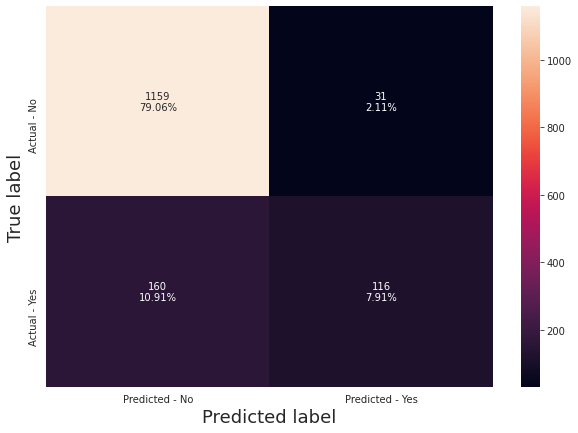

In [77]:
print('--- DEFAULT CONFUSION MATRIX ---')
print()
make_confusion_matrix(gbc,y_test)

--- HYPERTUNING CONFUSION MATRIX ---



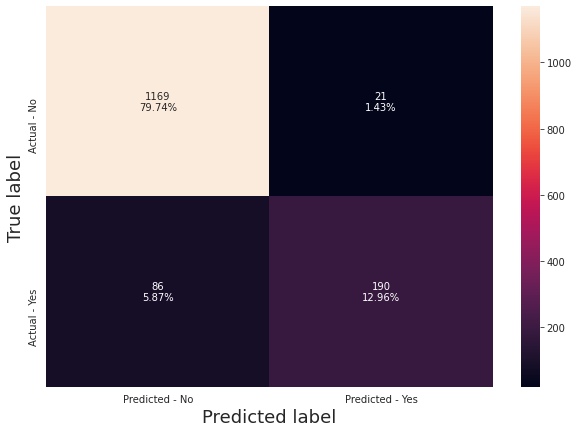

In [78]:
print('--- HYPERTUNING CONFUSION MATRIX ---')
print()
make_confusion_matrix(gbc_tuned,y_test)

`INSIGHTS`

`Gradient Boost Classifier default settings are NOT overfitting the training data - but Recall and F1 are too low. Accuracy and Precision are acceptable in the 80’s. Hyperparameter settings have improved the numbers but there are a few signs of overfitting with the tuned settings. More study is needed to find the “sweet spot” for Gradient Boost Classifier hyperparameters.`



> ### **XG BOOST CLASSIFIER**



In [79]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [80]:
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.881578947368421
Accuracy on test set :  0.8622100954979536

Recall on training set :  0.4332298136645963
Recall on test set :  0.35507246376811596

Precision on training set :  0.8746081504702194
Precision on test set :  0.8032786885245902

F1 on training set :  0.5794392523364487
F1 on test set :  0.4924623115577889




> *`HYPERPARAMETER TUNING AND IMPROVEMENT - XGBoost Classifier`*



In [81]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": [50, 150, 200],
    "learning_rate": [0.1, 0.3, 1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
              n_estimators=200, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

*`PERFORMANCE EVALUATION - XGBoost Classifier`*

In [82]:
print ('---DEFAULT PERFORMANCE---')
xgb_score=get_metrics_score(xgb)
print()
print()
print ('---HYPERTUNING PERFORMANCE---')
xgb_tuned_score=get_metrics_score(xgb_tuned)

---DEFAULT PERFORMANCE---
Accuracy on training set :  0.881578947368421
Accuracy on test set :  0.8622100954979536

Recall on training set :  0.4332298136645963
Recall on test set :  0.35507246376811596

Precision on training set :  0.8746081504702194
Precision on test set :  0.8032786885245902

F1 on training set :  0.5794392523364487
F1 on test set :  0.4924623115577889


---HYPERTUNING PERFORMANCE---
Accuracy on training set :  0.9988304093567252
Accuracy on test set :  0.91268758526603

Recall on training set :  0.9953416149068323
Recall on test set :  0.6666666666666666

Precision on training set :  0.9984423676012462
Precision on test set :  0.8363636363636363

F1 on training set :  0.9968895800933125
F1 on test set :  0.7419354838709676


--- DEFAULT CONFUSION MATRIX ---



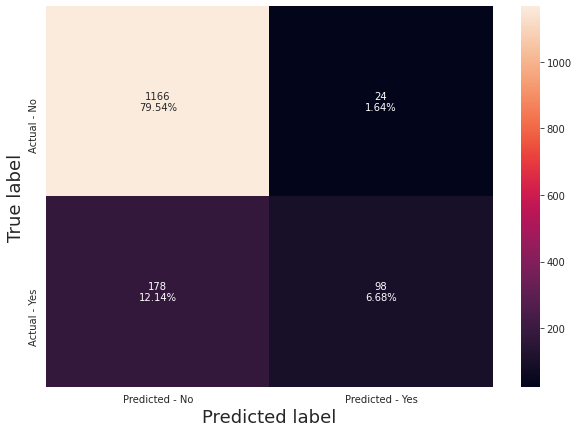

In [83]:
print('--- DEFAULT CONFUSION MATRIX ---')
print()
make_confusion_matrix(xgb,y_test)

--- HYPERTUNING CONFUSION MATRIX ---



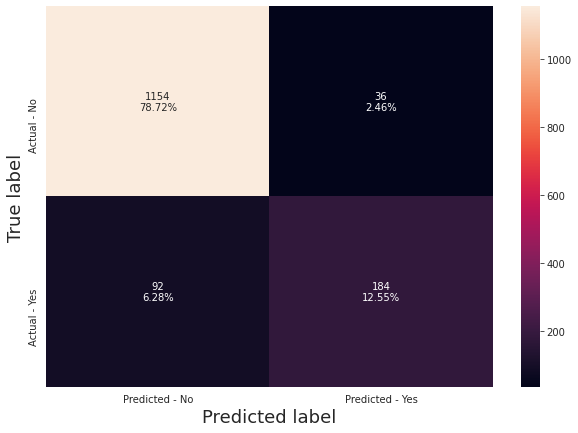

In [84]:
print('--- HYPERTUNING CONFUSION MATRIX ---')
print()
make_confusion_matrix(xgb_tuned,y_test)

`INSIGHTS`

`XG Boost Classifier default settings are NOT overfitting the training data. Hyperparameter settings have improved the numbers but there are a few signs of overfitting with the tuned settings. More study is needed to find the “sweet spot” for XG BoostClassifier hyperparameters.`



> ### **STACKING CLASSIFIER**



In [85]:
estimators=[('Decision Tree', dTree),('Random Forest', rf_estimator),
           ('Gradient Boosting', gbc)]
final_estimator=XGBClassifier(random_state=1)

In [86]:
stk_default = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)
stk_default.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
             

In [87]:
stacking_estimator_score=get_metrics_score(stk_default)

Accuracy on training set :  1.0
Accuracy on test set :  0.946793997271487

Recall on training set :  1.0
Recall on test set :  0.8079710144927537

Precision on training set :  1.0
Precision on test set :  0.8991935483870968

F1 on training set :  1.0
F1 on test set :  0.8511450381679388




> *`TUNED AND IMPROVED MODELS USED AS ESTIMATORS FOR STACKING AND IMPROVEMENT`*



In [88]:
estimators=[('Decision Tree', dTree_tuned),('Random Forest', rf_estimator_tuned),
           ('Gradient Boosting', gbc_tuned)]
final_estimator=XGBClassifier(random_state=1)

In [89]:
stk = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)
stk.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=5,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
             

In [90]:
stacking_estimator_score=get_metrics_score(stk)

Accuracy on training set :  0.9961988304093568
Accuracy on test set :  0.932469304229195

Recall on training set :  0.984472049689441
Recall on test set :  0.7681159420289855

Precision on training set :  0.9952904238618524
Precision on test set :  0.8582995951417004

F1 on training set :  0.9898516783762685
F1 on test set :  0.8107074569789674


`INSIGHTS`

`Stacking Classifier based on defaults is overfitting as expected. However, based on tuned estimators, overfitting has been improved although there are still signs of overfitting. This will be improved with experience in hyperparameter tuning`

## `Of the Boosting Classifers, we will choose the Stacking Classifer based on the tuned estimators with Precision in mind - see Actionable Insights in the section at the end of this page for details and feature importances.`

## **Actionable Insights & Recommendations - *5 points***



> ### **COMPARE MODELS**



In [91]:
# defining list of models
models = [bagging_estimator, bagging_estimator_tuned, rf_estimator, rf_estimator_tuned, dTree, dTree_tuned, abc, abc_tuned, gbc, gbc_tuned, xgb, xgb_tuned, stk_default, stk]
# defining empty lists to add train and test results
train_acc = []
test_acc = []
train_recall = []
test_recall = []
train_precision = []
test_precision = []
train_f1 = []
test_f1 = []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_metrics_score(model)
    train_acc.append(j[0])
    test_acc.append(j[1])
    train_recall.append(j[2])
    test_recall.append(j[3])
    train_precision.append(j[4])
    test_precision.append(j[5])
    train_f1.append(j[6])
    test_f1.append(j[7])

Accuracy on training set :  0.9932748538011696
Accuracy on test set :  0.903137789904502

Recall on training set :  0.967391304347826
Recall on test set :  0.6304347826086957

Precision on training set :  0.9968
Precision on test set :  0.8130841121495327

F1 on training set :  0.9818754925137904
F1 on test set :  0.710204081632653
Accuracy on training set :  0.9365497076023391
Accuracy on test set :  0.8758526603001364

Recall on training set :  0.7018633540372671
Recall on test set :  0.4855072463768116

Precision on training set :  0.9475890985324947
Precision on test set :  0.7701149425287356

F1 on training set :  0.8064228367528993
F1 on test set :  0.5955555555555555
Accuracy on training set :  1.0
Accuracy on test set :  0.9229195088676672

Recall on training set :  1.0
Recall on test set :  0.6195652173913043

Precision on training set :  1.0
Precision on test set :  0.9553072625698324

F1 on training set :  1.0
F1 on test set :  0.7516483516483516
Accuracy on training set :  

In [92]:
comparison_frame = pd.DataFrame({'Model':['Bagging', 'Tuned Bagging', 'Random Forest','Tuned Random Forest', 'Decision Tree','Tuned Decision Tree',
                                          'AdaBoost', 'Tuned AdaBoost',
                                          'Gradient Boosting', 'Tuned Gradient Boosting',
                                          'XGBoost',  'Tuned XGBoost','Stacking Default', 'Stacking Tuned'], 
                                          'train_acc': train_acc,'test_acc': test_acc,
                                          'train_recall': train_recall,'test_recall': test_recall,
                                          'train_precision': train_precision, 'test_precision': test_precision,
                                          'train_f1' : train_f1, 'test_f1': test_f1
                                 }) 
comparison_frame

,Model,train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1
0,Bagging,0.993275,0.903138,0.967391,0.630435,0.996800,0.813084,0.981875,0.710204
1,Tuned Bagging,0.936550,0.875853,0.701863,0.485507,0.947589,0.770115,0.806423,0.595556
2,Random Forest,1.000000,0.922920,1.000000,0.619565,1.000000,0.955307,1.000000,0.751648
3,Tuned Random Forest,0.981579,0.907913,0.902174,0.536232,1.000000,0.954839,0.948571,0.686775
4,Decision Tree,1.000000,0.898363,1.000000,0.724638,1.000000,0.732601,1.000000,0.728597
5,Tuned Decision Tree,0.929825,0.864256,0.767081,0.579710,0.845890,0.658436,0.804560,0.616570
6,AdaBoost,0.849415,0.847885,0.307453,0.307971,0.741573,0.726496,0.434687,0.432570
7,Tuned AdaBoost,0.990936,0.892906,0.956522,0.644928,0.995153,0.751055,0.975455,0.693957
8,Gradient Boosting,0.888889,0.869714,0.470497,0.420290,0.885965,0.789116,0.614604,0.548463
9,Tuned Gradient Boosting,0.998246,0.927012,0.990683,0.688406,1.000000,0.900474,0.995320,0.780287


In [93]:
# for bagging based models, we choose the Tuned Decision Tree
comparison_frame.iloc[5,:]

Model              Tuned Decision Tree
train_acc                     0.929825
test_acc                      0.864256
train_recall                  0.767081
test_recall                    0.57971
train_precision                0.84589
test_precision                0.658436
train_f1                       0.80456
test_f1                        0.61657
Name: 5, dtype: object

`Due to the emphasis in the project statement Background and Context about keeping marketing costs low, we want to keep the False Positives low. Although Tuned Decision Tree doesn't have the highest scores, it has the best balance of score and avoiding overtraining with Precision in mind.`

Feature Importances for Tuned Decision Tree:

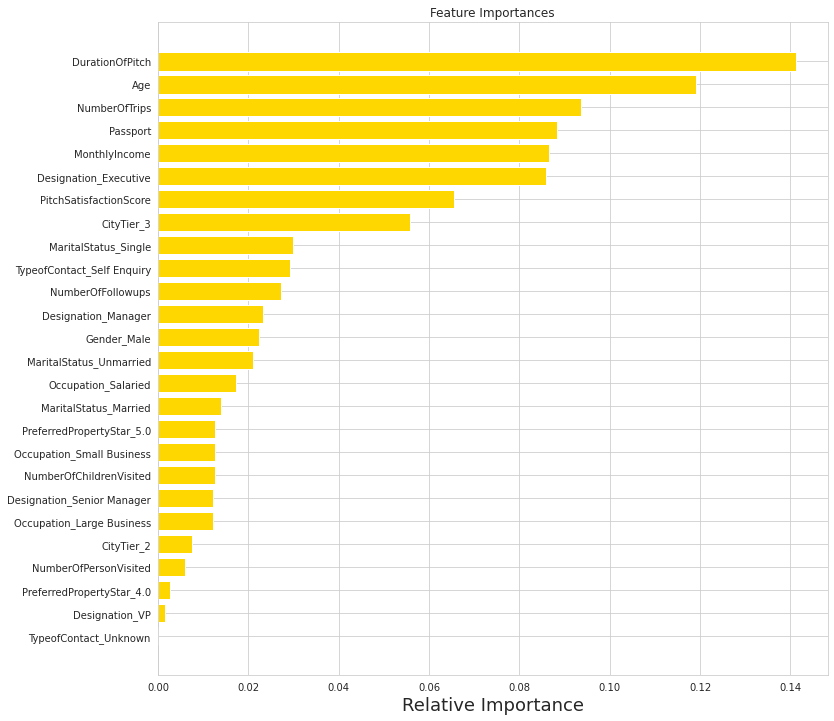

In [94]:
feature_names = X_train.columns
importances = dTree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='gold', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [95]:
# for boosting based models, we choose the Stacking Tuned Model
comparison_frame.iloc[13,:]

Model              Stacking Tuned
train_acc                0.996199
test_acc                 0.932469
train_recall             0.984472
test_recall              0.768116
train_precision           0.99529
test_precision             0.8583
train_f1                 0.989852
test_f1                  0.810707
Name: 13, dtype: object

`Similar to the Tuned Decision Tree, of the boosting models - Stacking Tuned provides the best balance of overtraining and score. There is some overtraining in this model, but it's the best of the boosting options with the current settings. Our main goal is to reduce False Positives`

--- TUNED DECISION TREE CONFUSION MATRIX ---



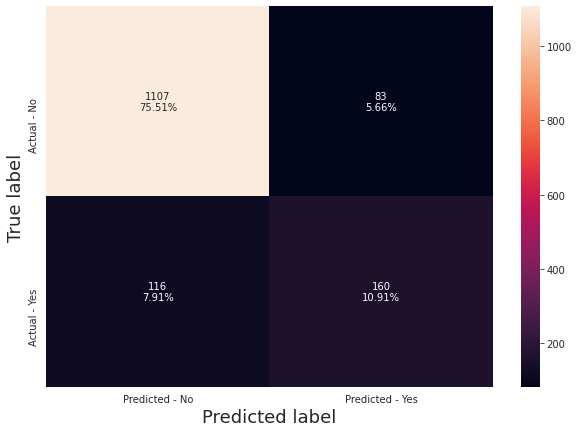

In [96]:
print('--- TUNED DECISION TREE CONFUSION MATRIX ---')
print()
make_confusion_matrix(dTree_tuned,y_test)

--- STACKING TUNED CONFUSION MATRIX ---



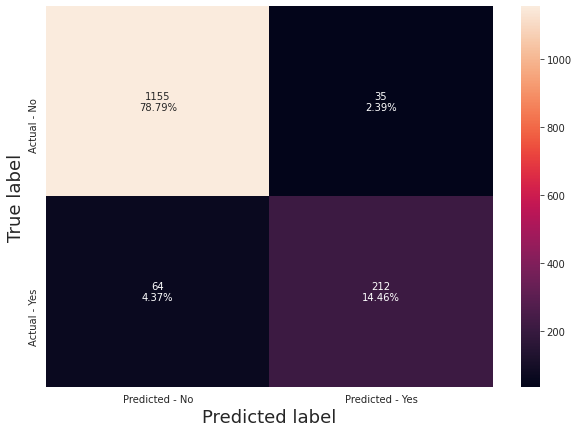

In [97]:
print('--- STACKING TUNED CONFUSION MATRIX ---')
print()
make_confusion_matrix(stk,y_test)

`Confusion matrix means`

True Positive (observed=1,predicted=1):
Correctly predicted that a potential customer would purchase the newly introduced package.

False Positive (observed=0,predicted=1):
Predicted that a potential customer would purchase the newly introduced package although they will NOT purchase the package.

True Negative (observed=0,predicted=0):
Correctly predicted that a potential customer would NOT purchase the package.

False Negative (observed=1,predicted=0):
Predicted that a potential customer would NOT purchase the package although they WILL purchase the package.


`Important Metric`


In the project statement, marketing costs were mentioned twice: "However, the marketing cost was quite high because customers were contacted at random without looking at the available information" AND "to make the marketing expenditure more efficient".

For that reason, we are focusing on Precision to keep False Positives as low as possible.

Thank you


Thomas Purdy